In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
! nvidia-smi

Sun Oct 29 08:42:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from IPython import display

display.clear_output()

! pip install ultralytics==8.0.134

import ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 7.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 117MB/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4hb41qOjX29oxqP9v6PZ")
project = rf.workspace("flowersdetection").project("flowers_segmentation")
dataset = project.version(15).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=dd06b92797b40105fc9757b136fe4475f1735465fd7ff1104eadcb3ff253774e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to flowers_segmentation-15 in yolov8:: 100%|██████████| 17339/17339 [00:05<00:00, 3374.84it/s]


In [ ]:
! yolo task = detect mode = train model = yolov8n.pt data={dataset.location}/data.yaml epochs=5 imgsz = 800

New https://pypi.org/project/ultralytics/8.0.155 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/flowers_segmentation-15/data.yaml, epochs=5, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=Fal

In [ ]:
!ls {HOME}/runs/detect/train2/


args.yaml					    results.png
confusion_matrix_normalized.png			    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1692182918.1571d3d47a24.3205.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


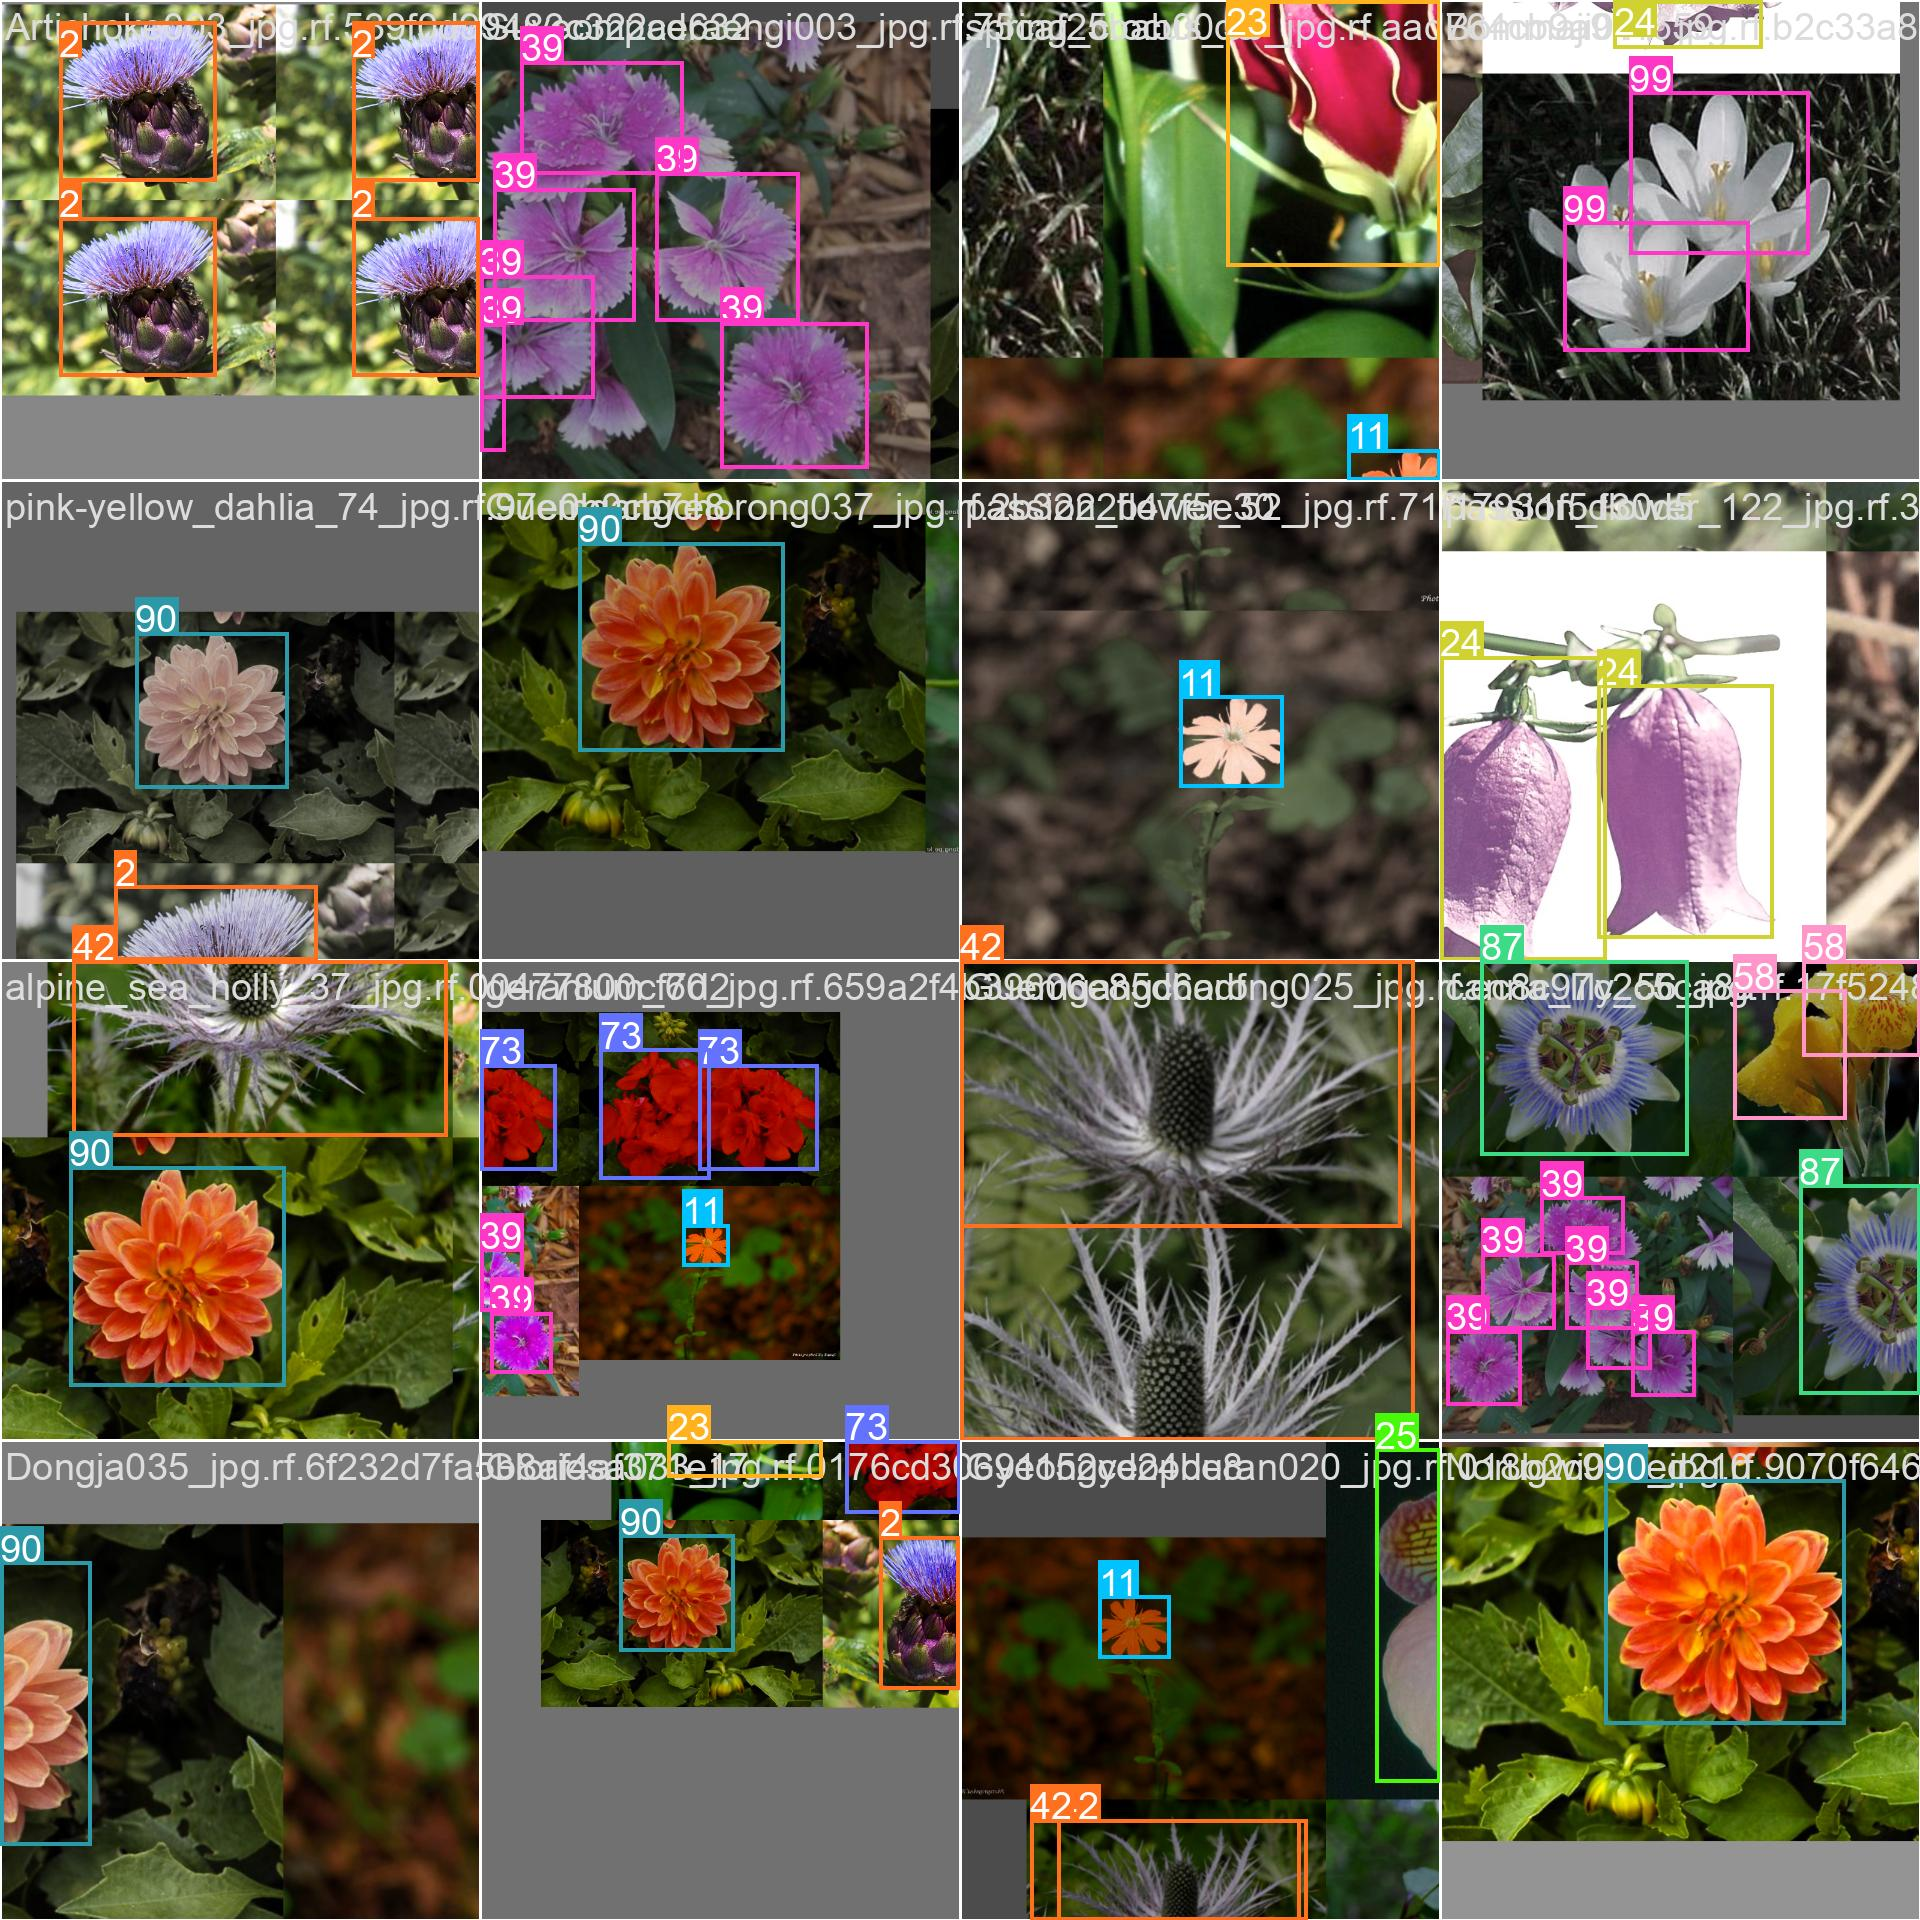

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/train_batch0.jpg',width=500)

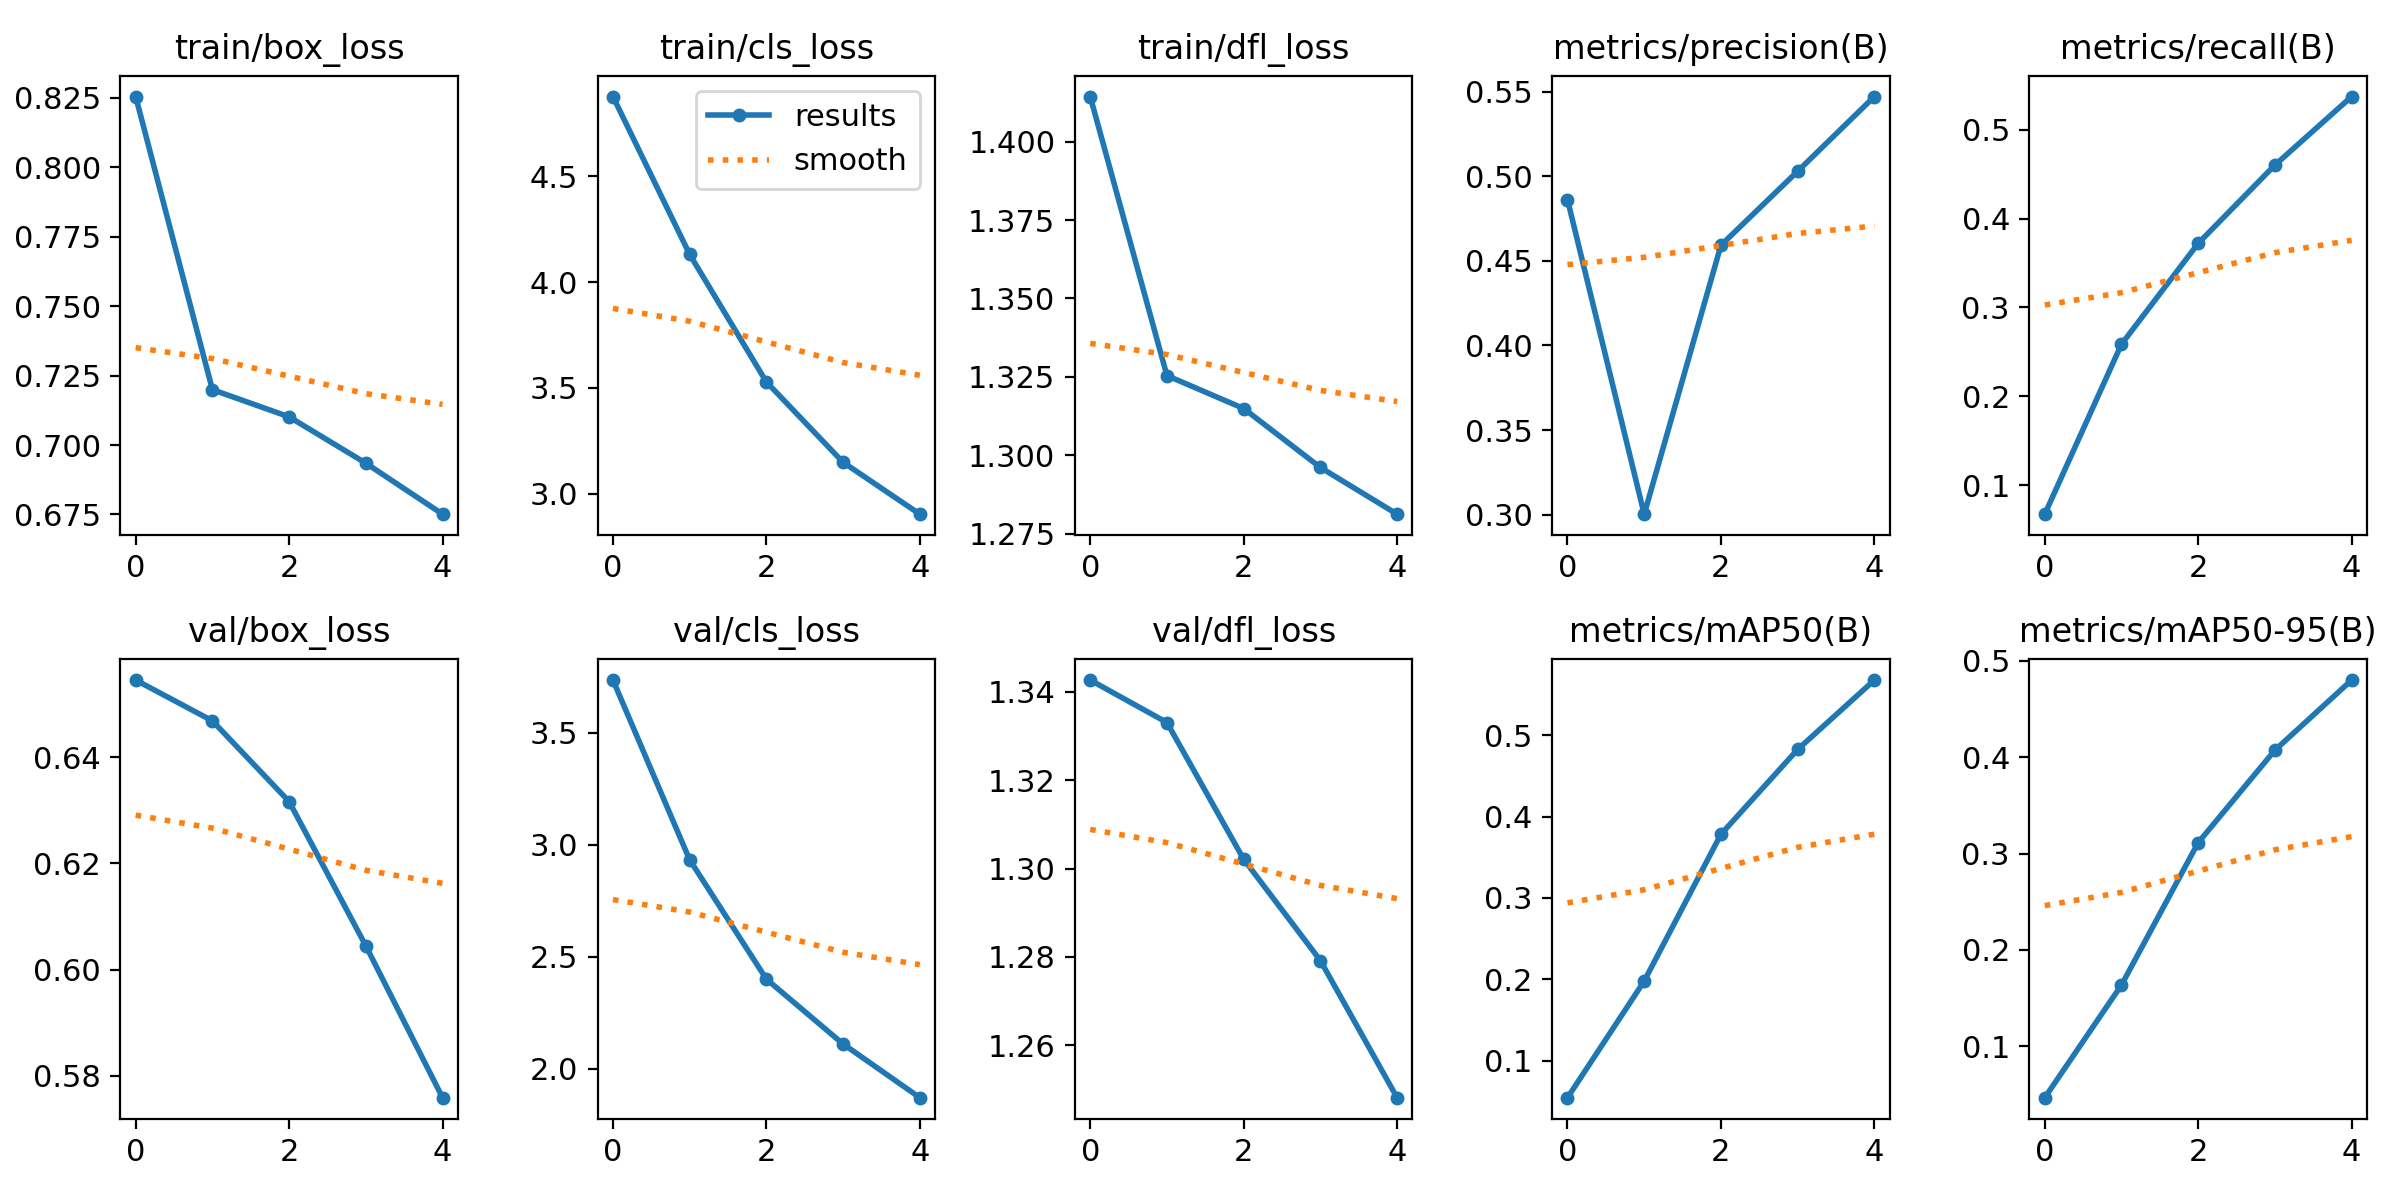

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/results.png',width=500)

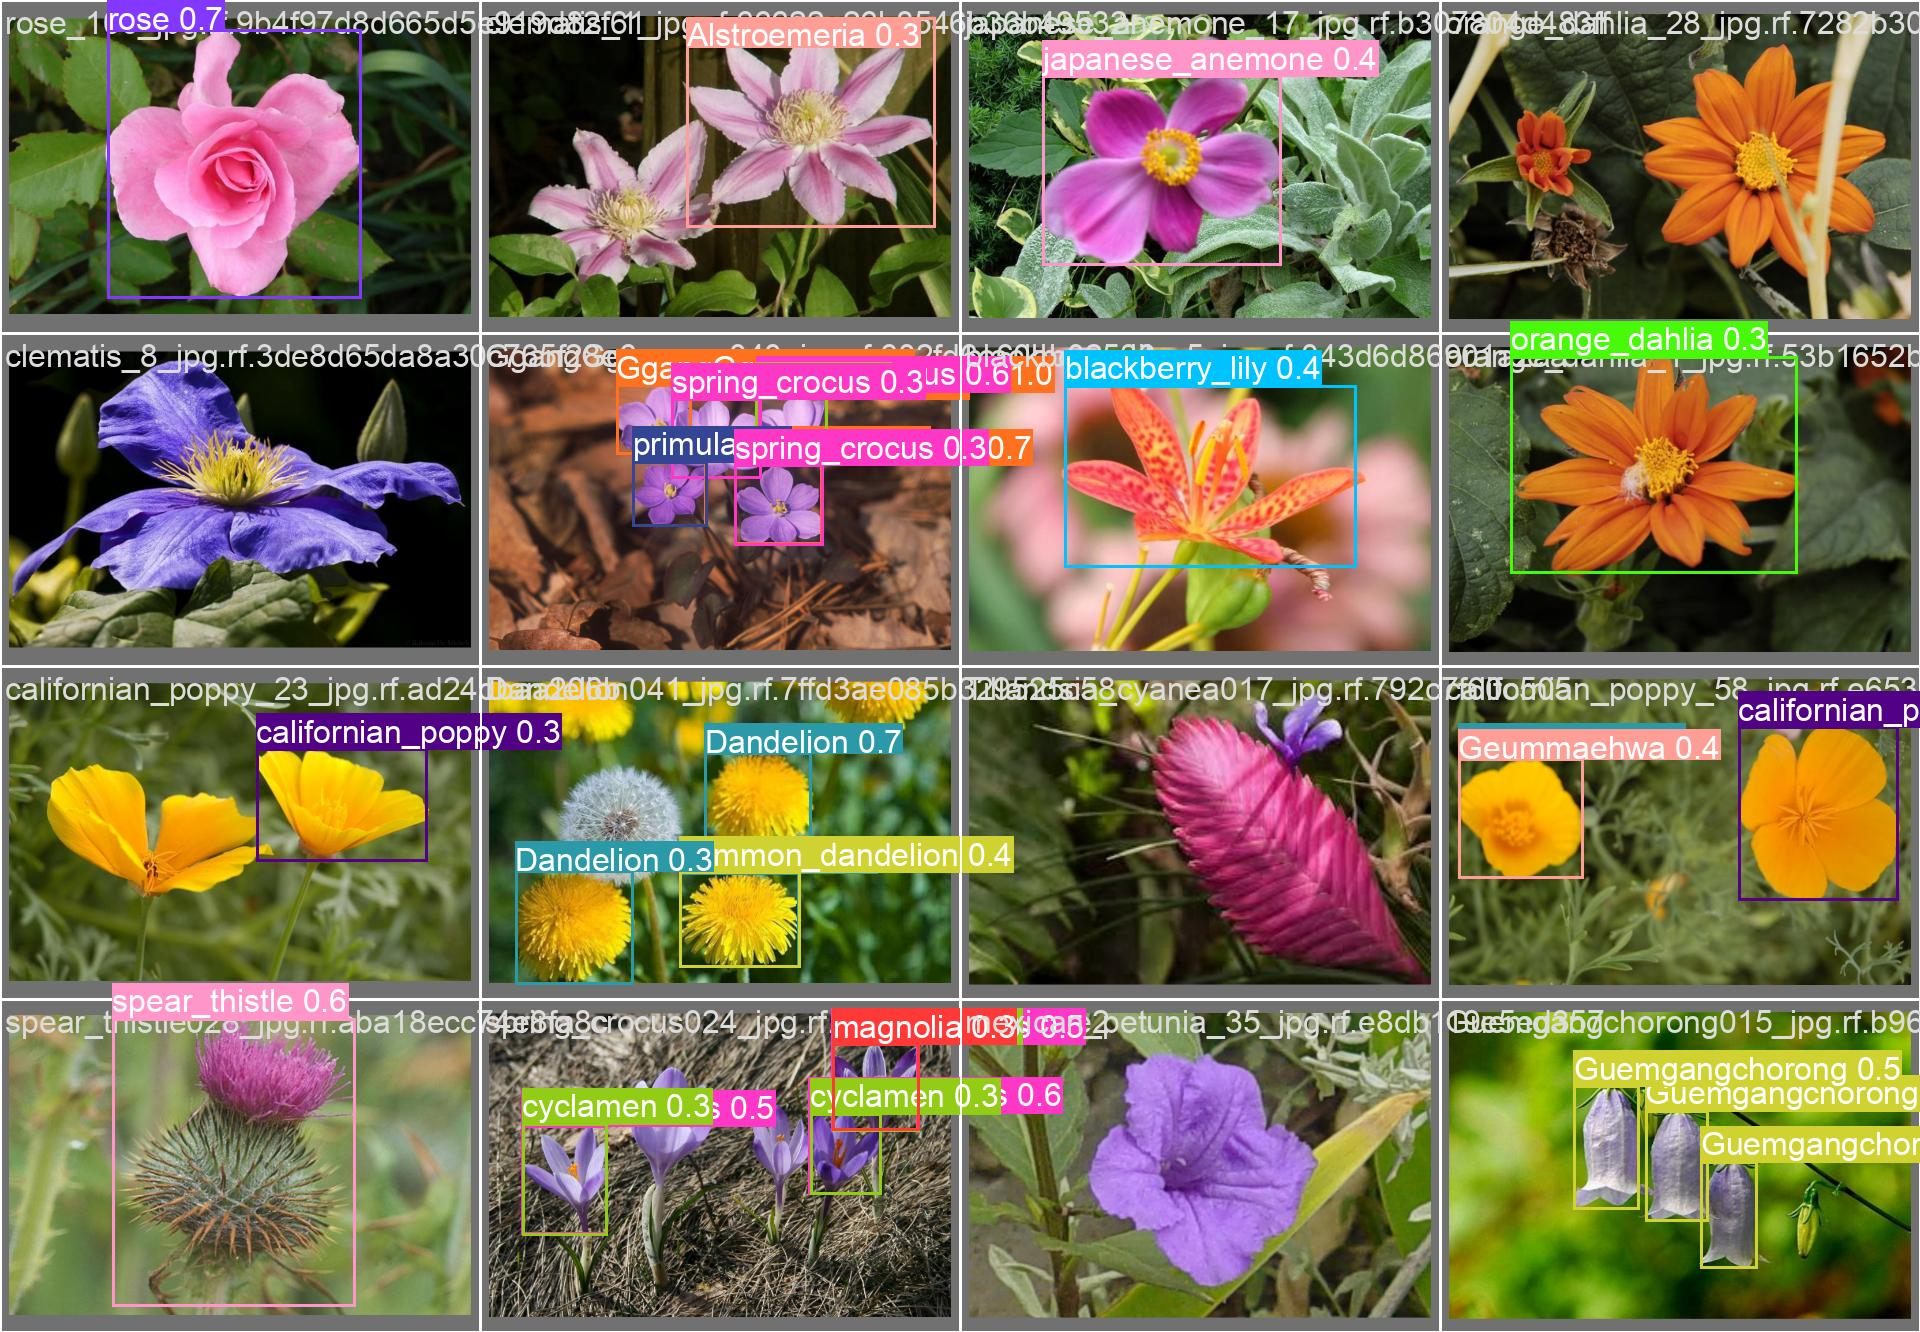

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/val_batch1_pred.jpg',width=500)

In [ ]:
from IPython.display import Image

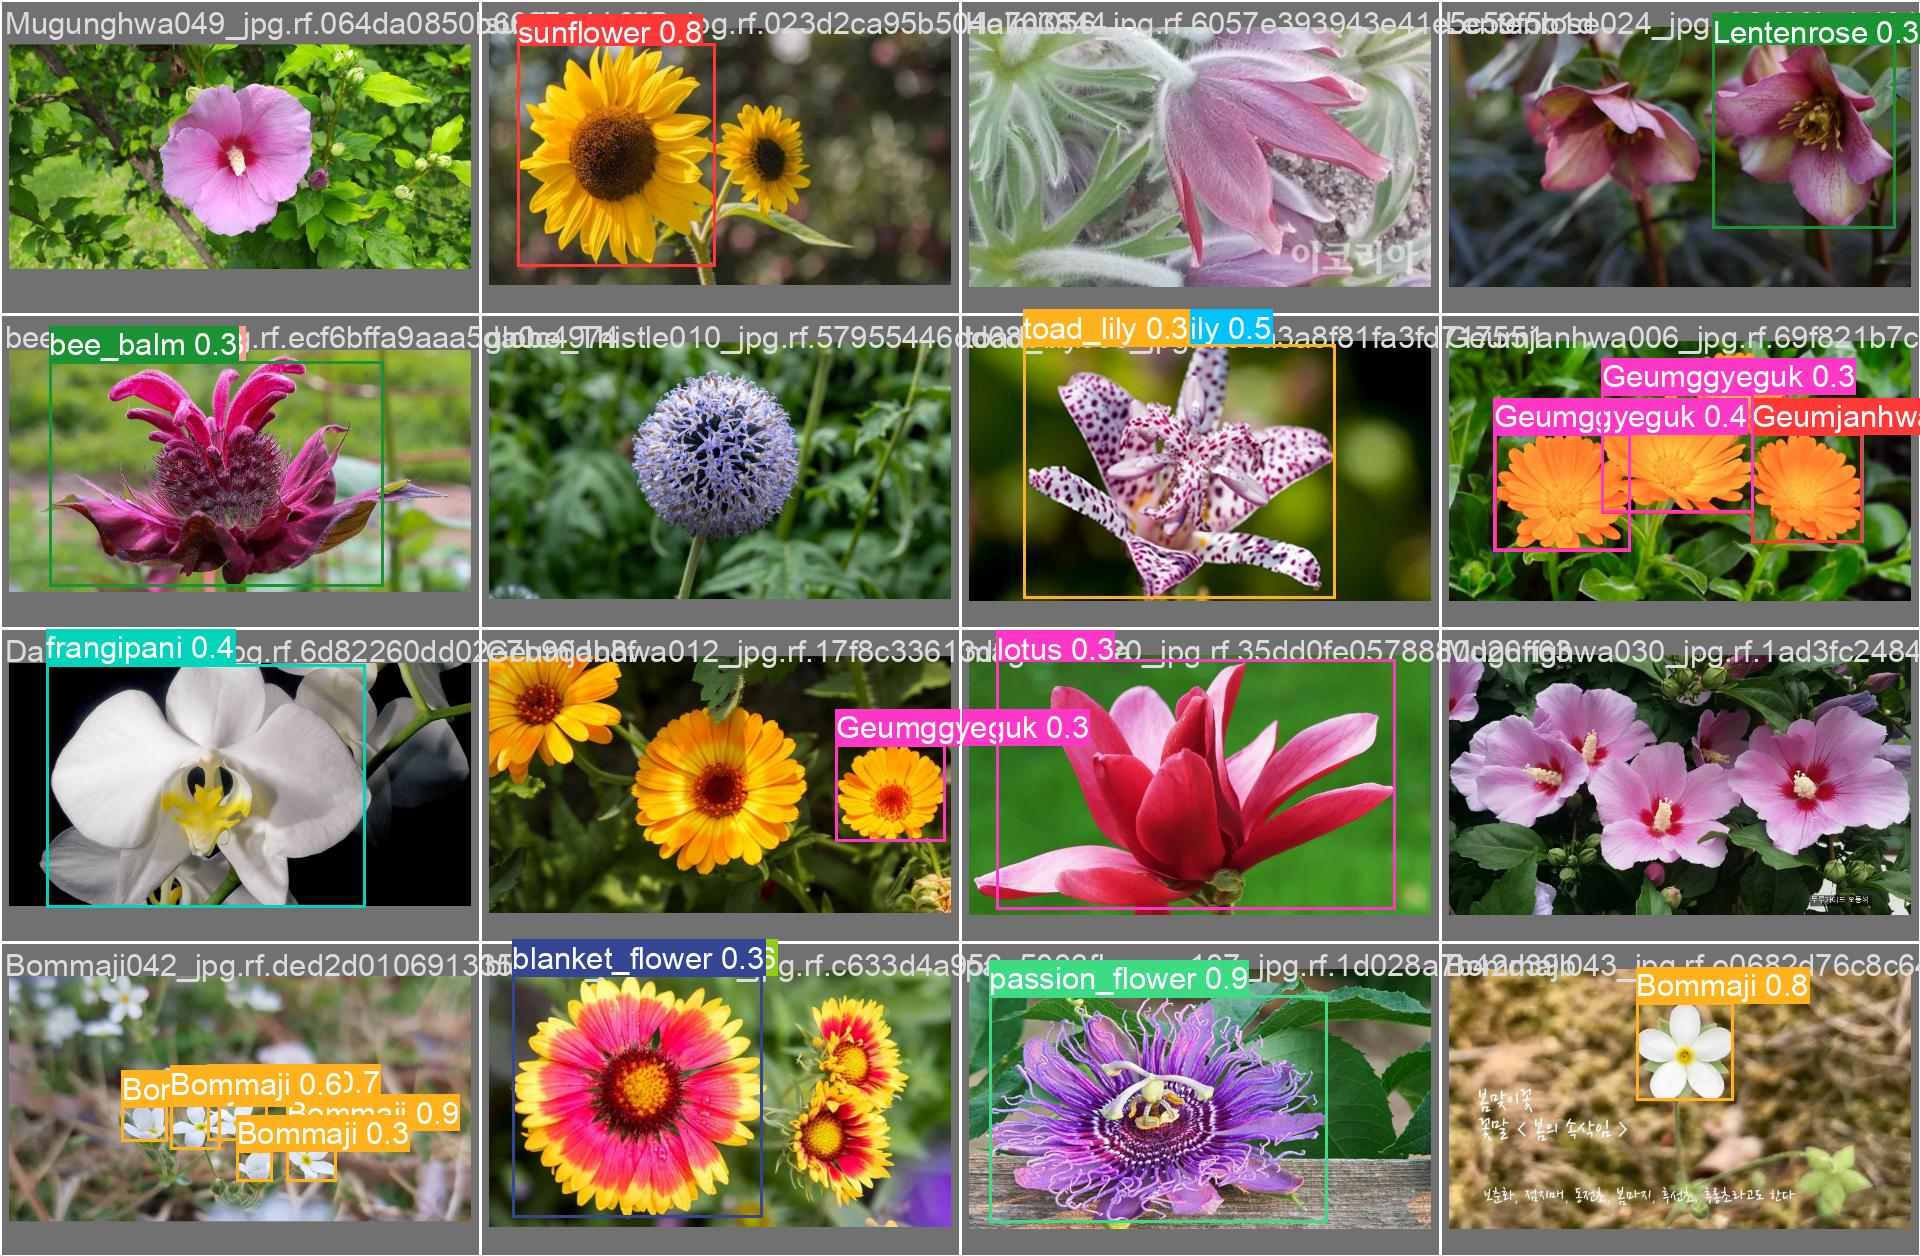

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg',width=500)

ObjectDetectionOnRoad


In [ ]:
! mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4hb41qOjX29oxqP9v6PZ")
project = rf.workspace("tutorial-nyak3").project("different-vechicle-on-road-detection")
dataset = project.version(1).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Different-vechicle-on-Road-Detection-1 in yolov8:: 100%|██████████| 478/478 [00:00<00:00, 6288.37it/s]


In [ ]:
! yolo task = detect mode = train model = yolov8n.pt data={dataset.location}/data.yaml epochs=30 imgsz = 800

100% 6.23M/6.23M [00:00<00:00, 302MB/s]
New https://pypi.org/project/ultralytics/8.0.202 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Different-vechicle-on-Road-Detection-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, 

In [ ]:
!ls {HOME}/runs/detect/train

args.yaml  weights


In [ ]:
from IPython.display import Image

Confusion Matrix for object detection or road


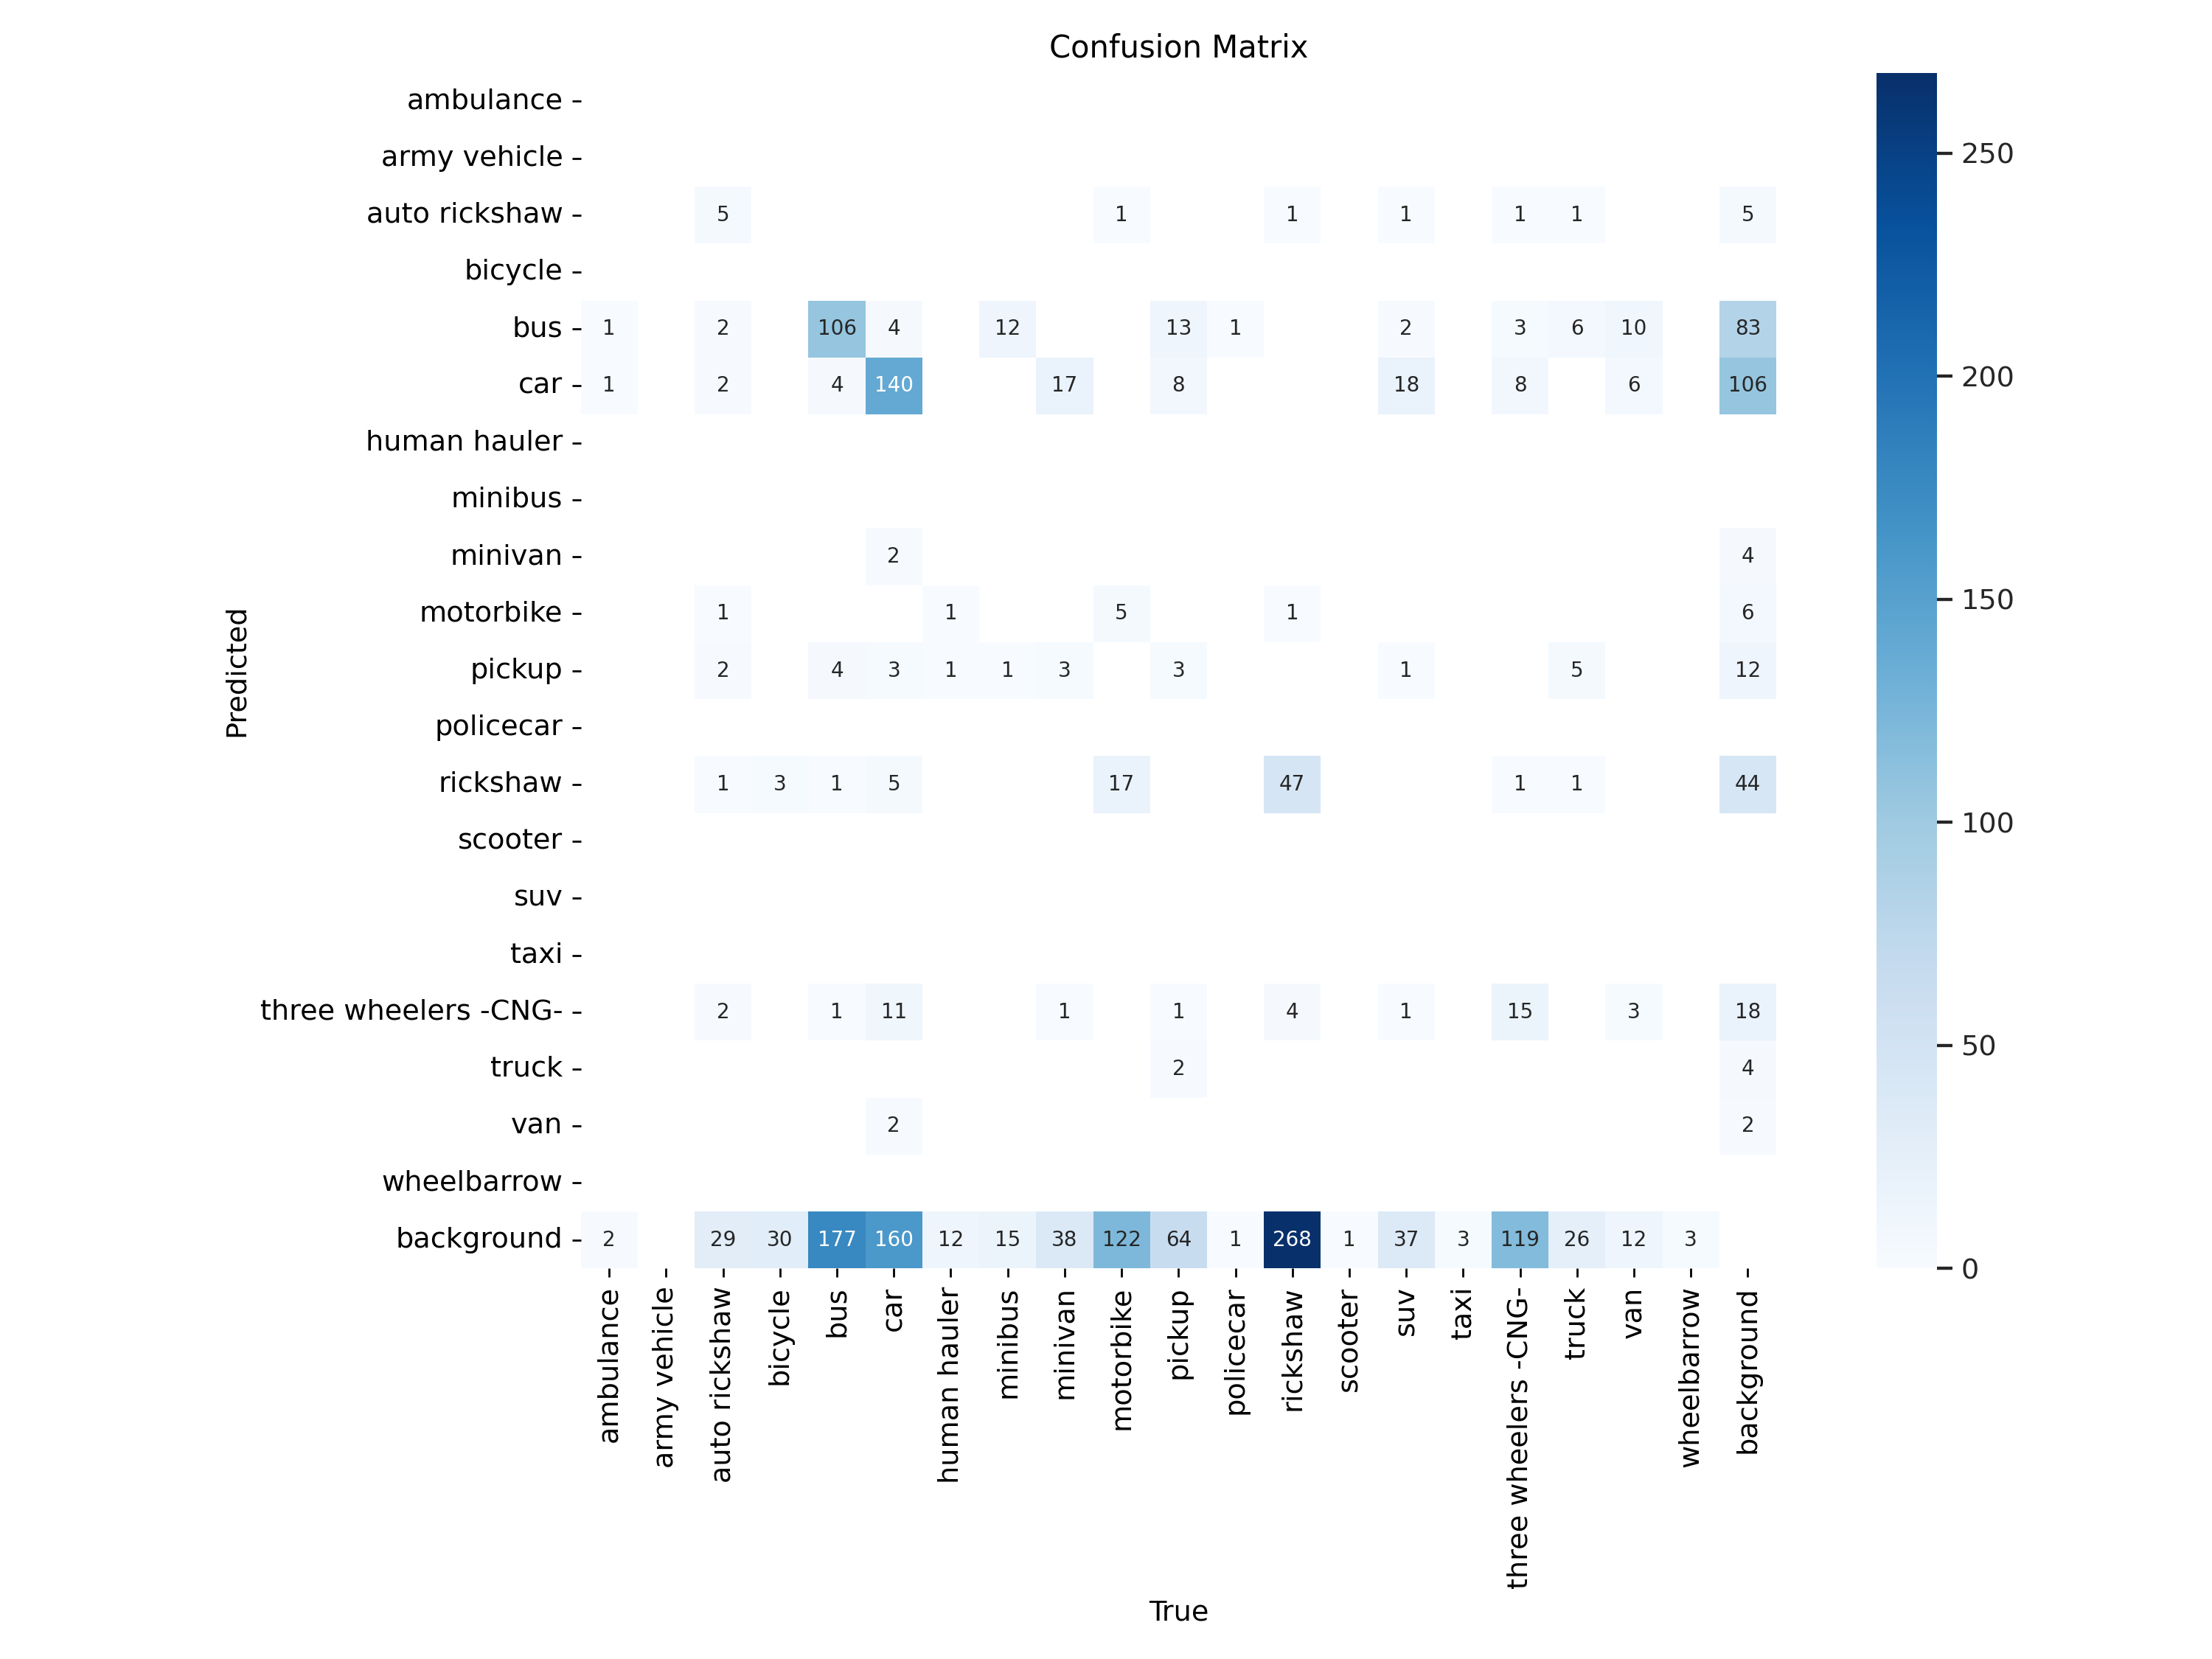

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png',width=600)

Results.png for object detection on Road

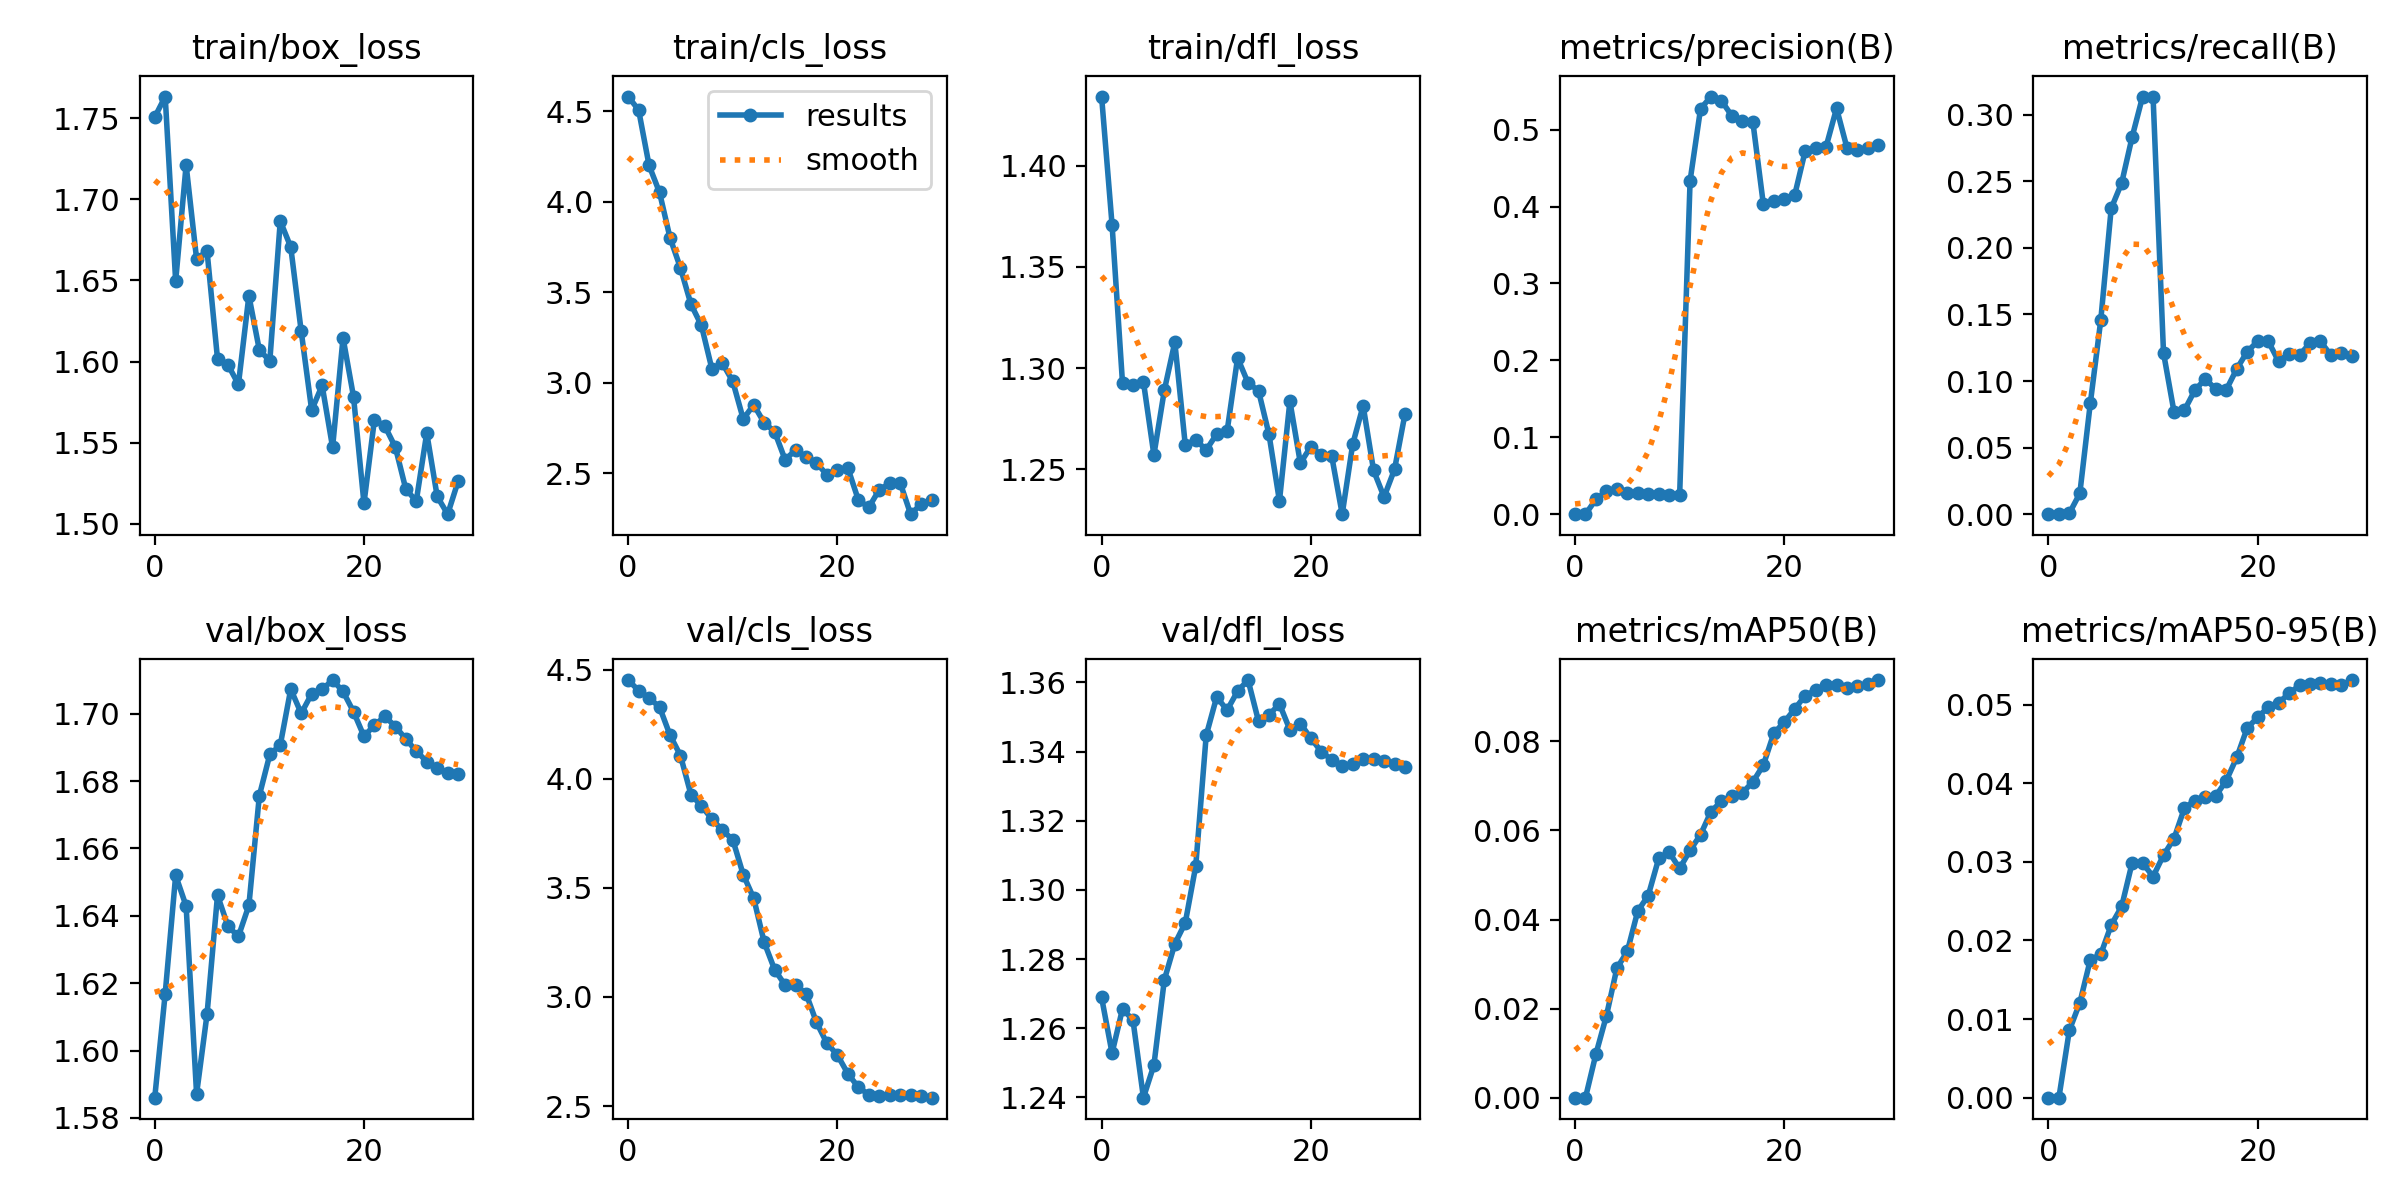

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/results.png',width=600)

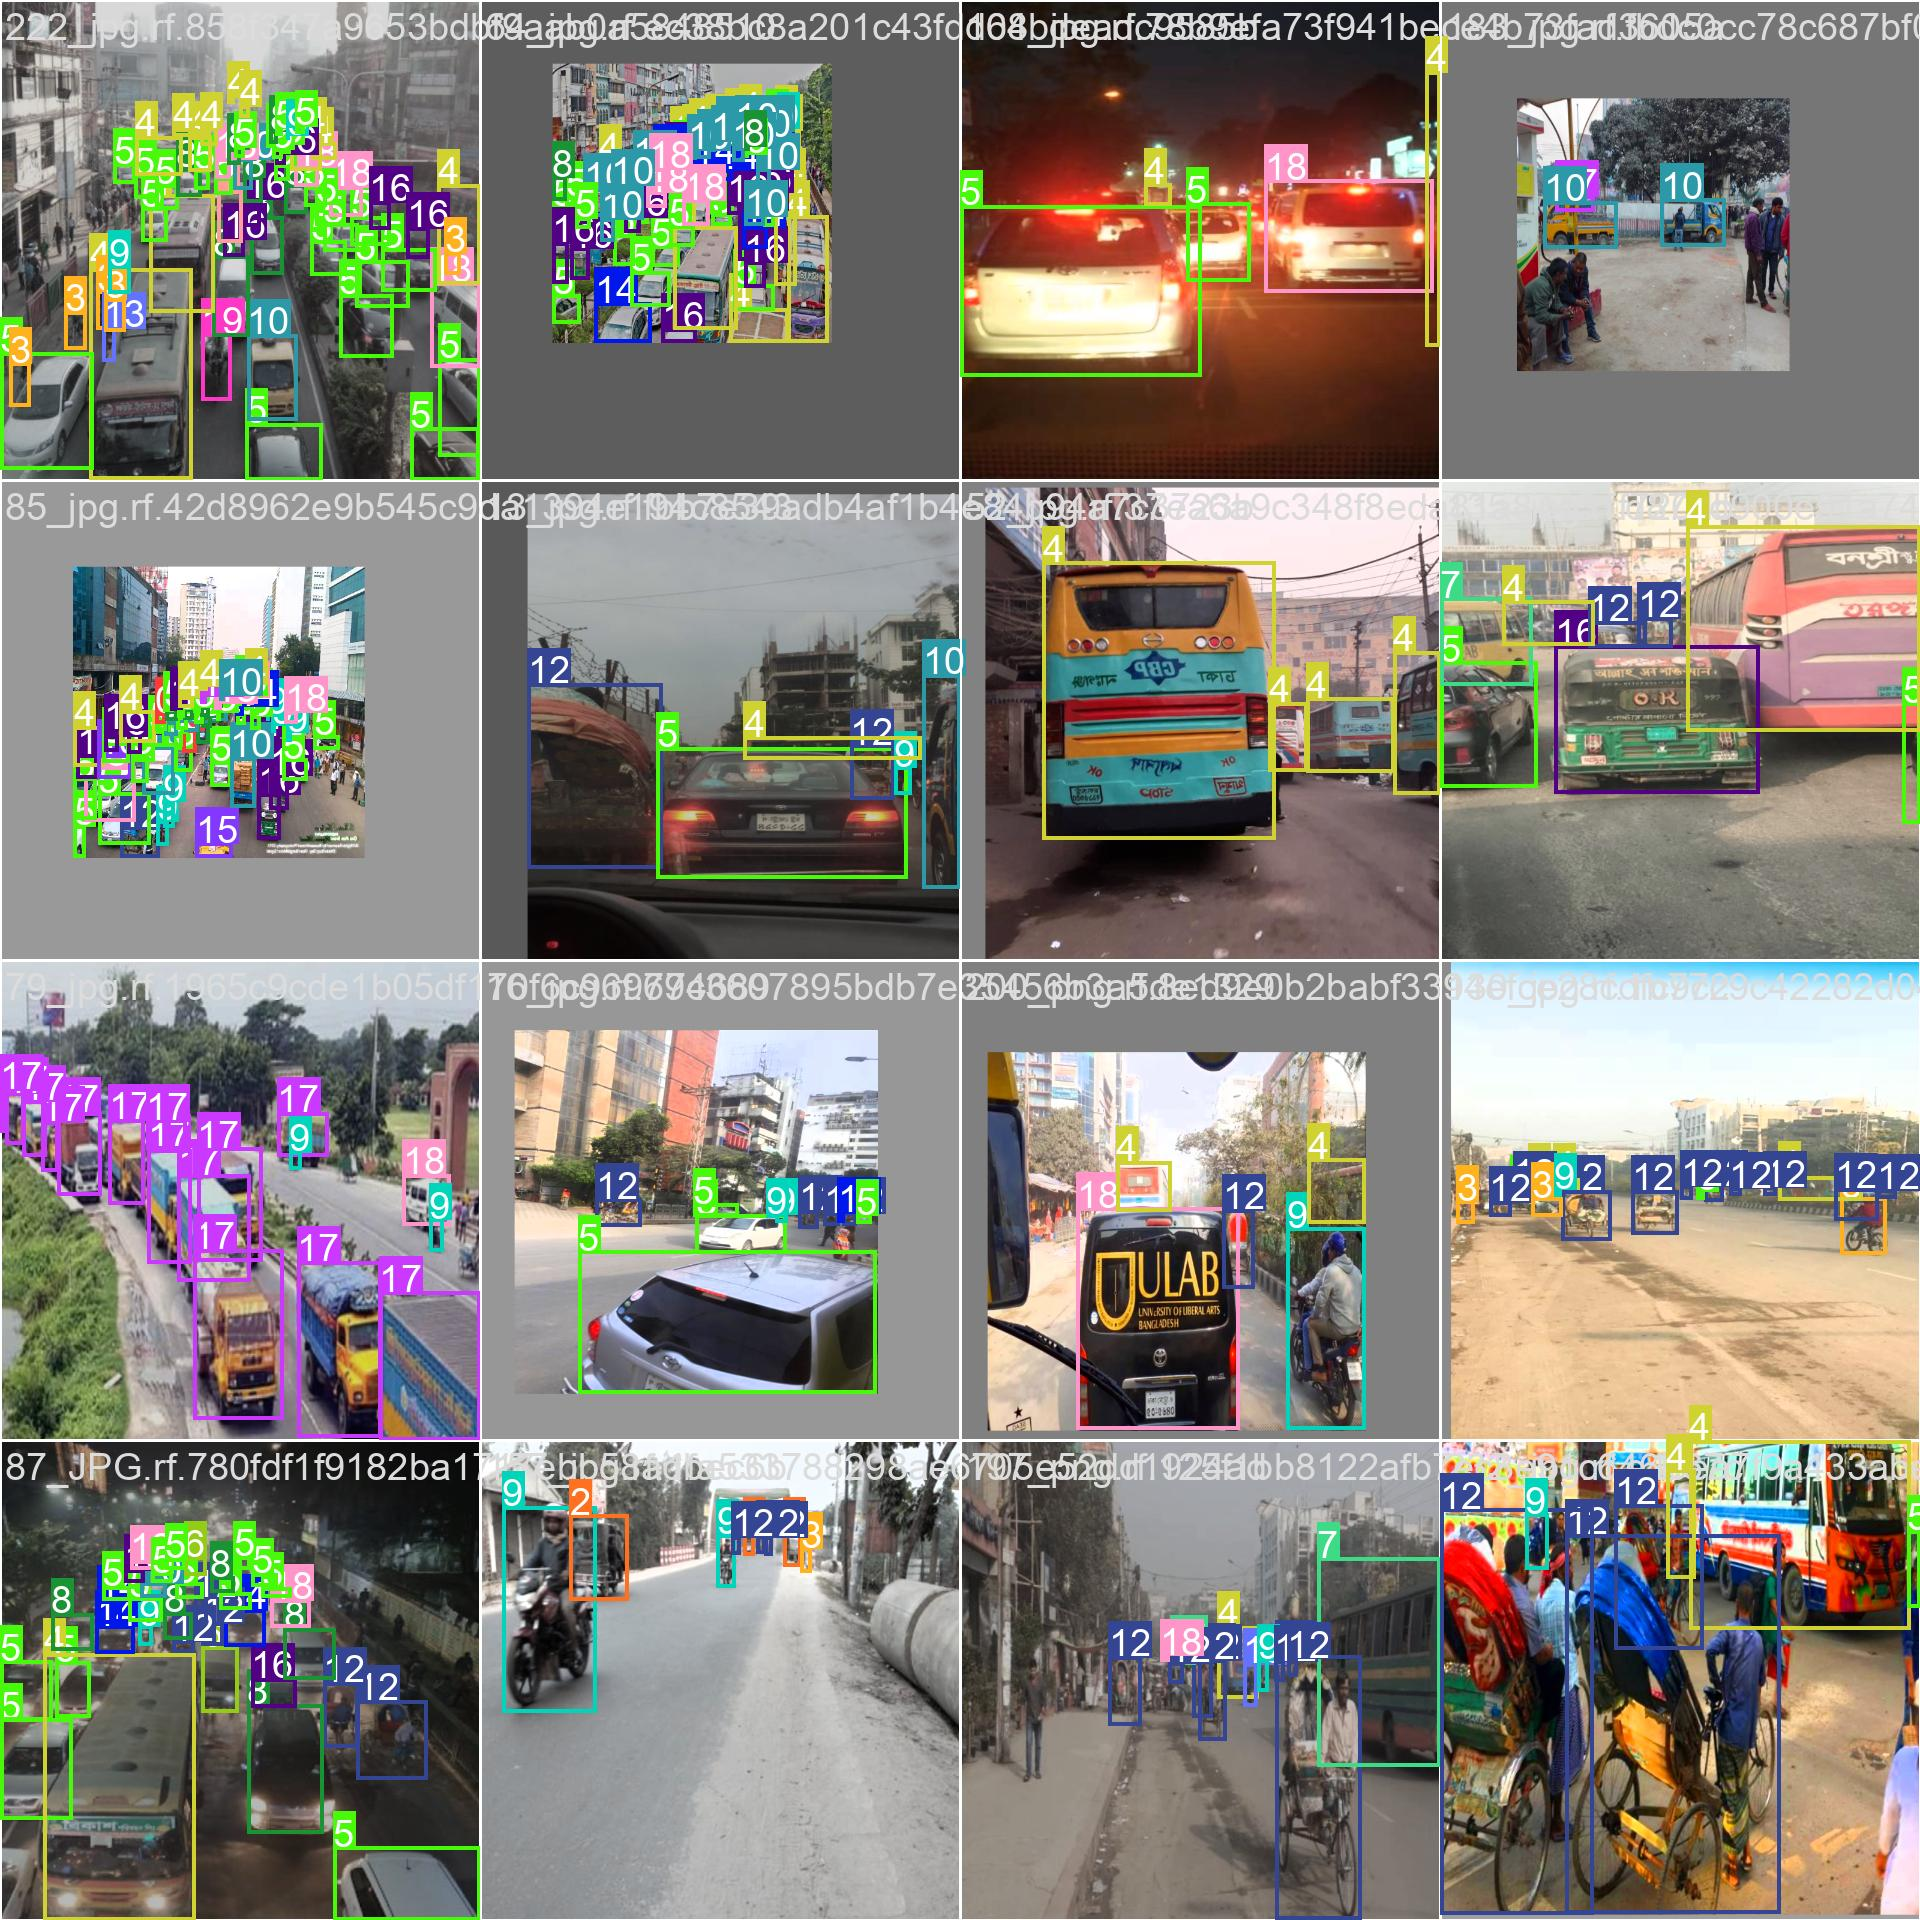

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/train_batch140.jpg',width=600)

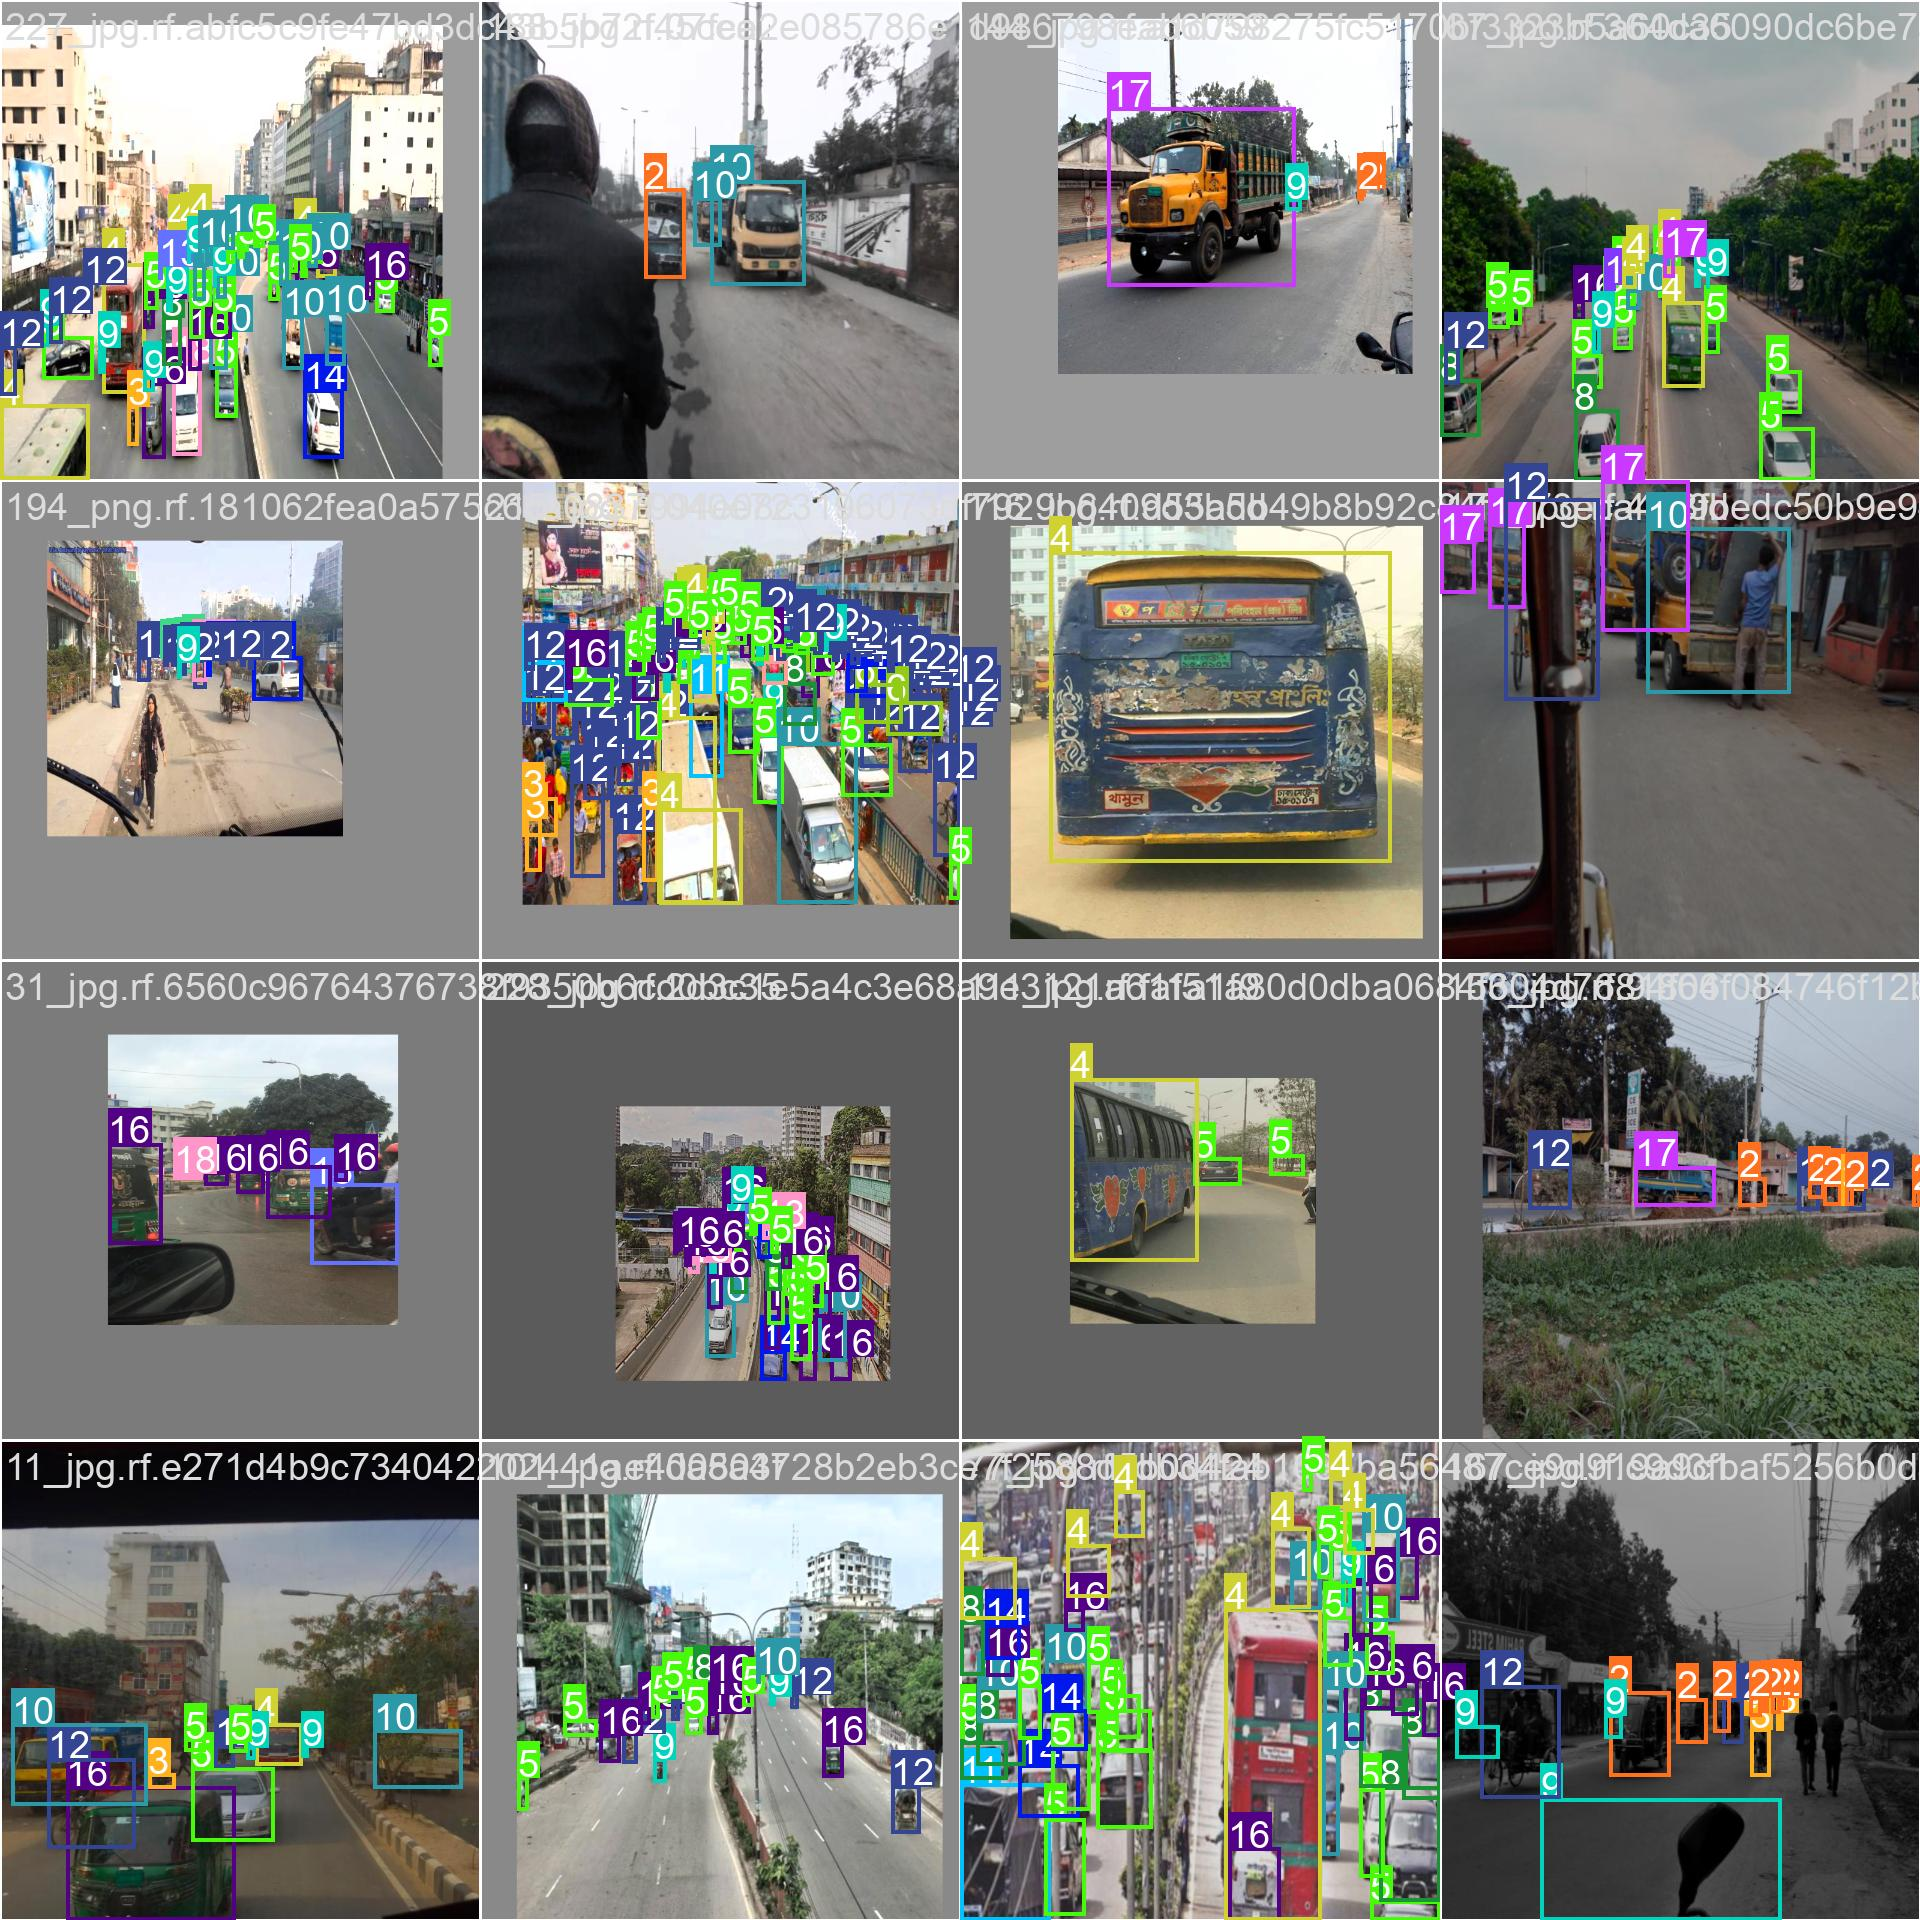

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/train_batch141.jpg',width=600)

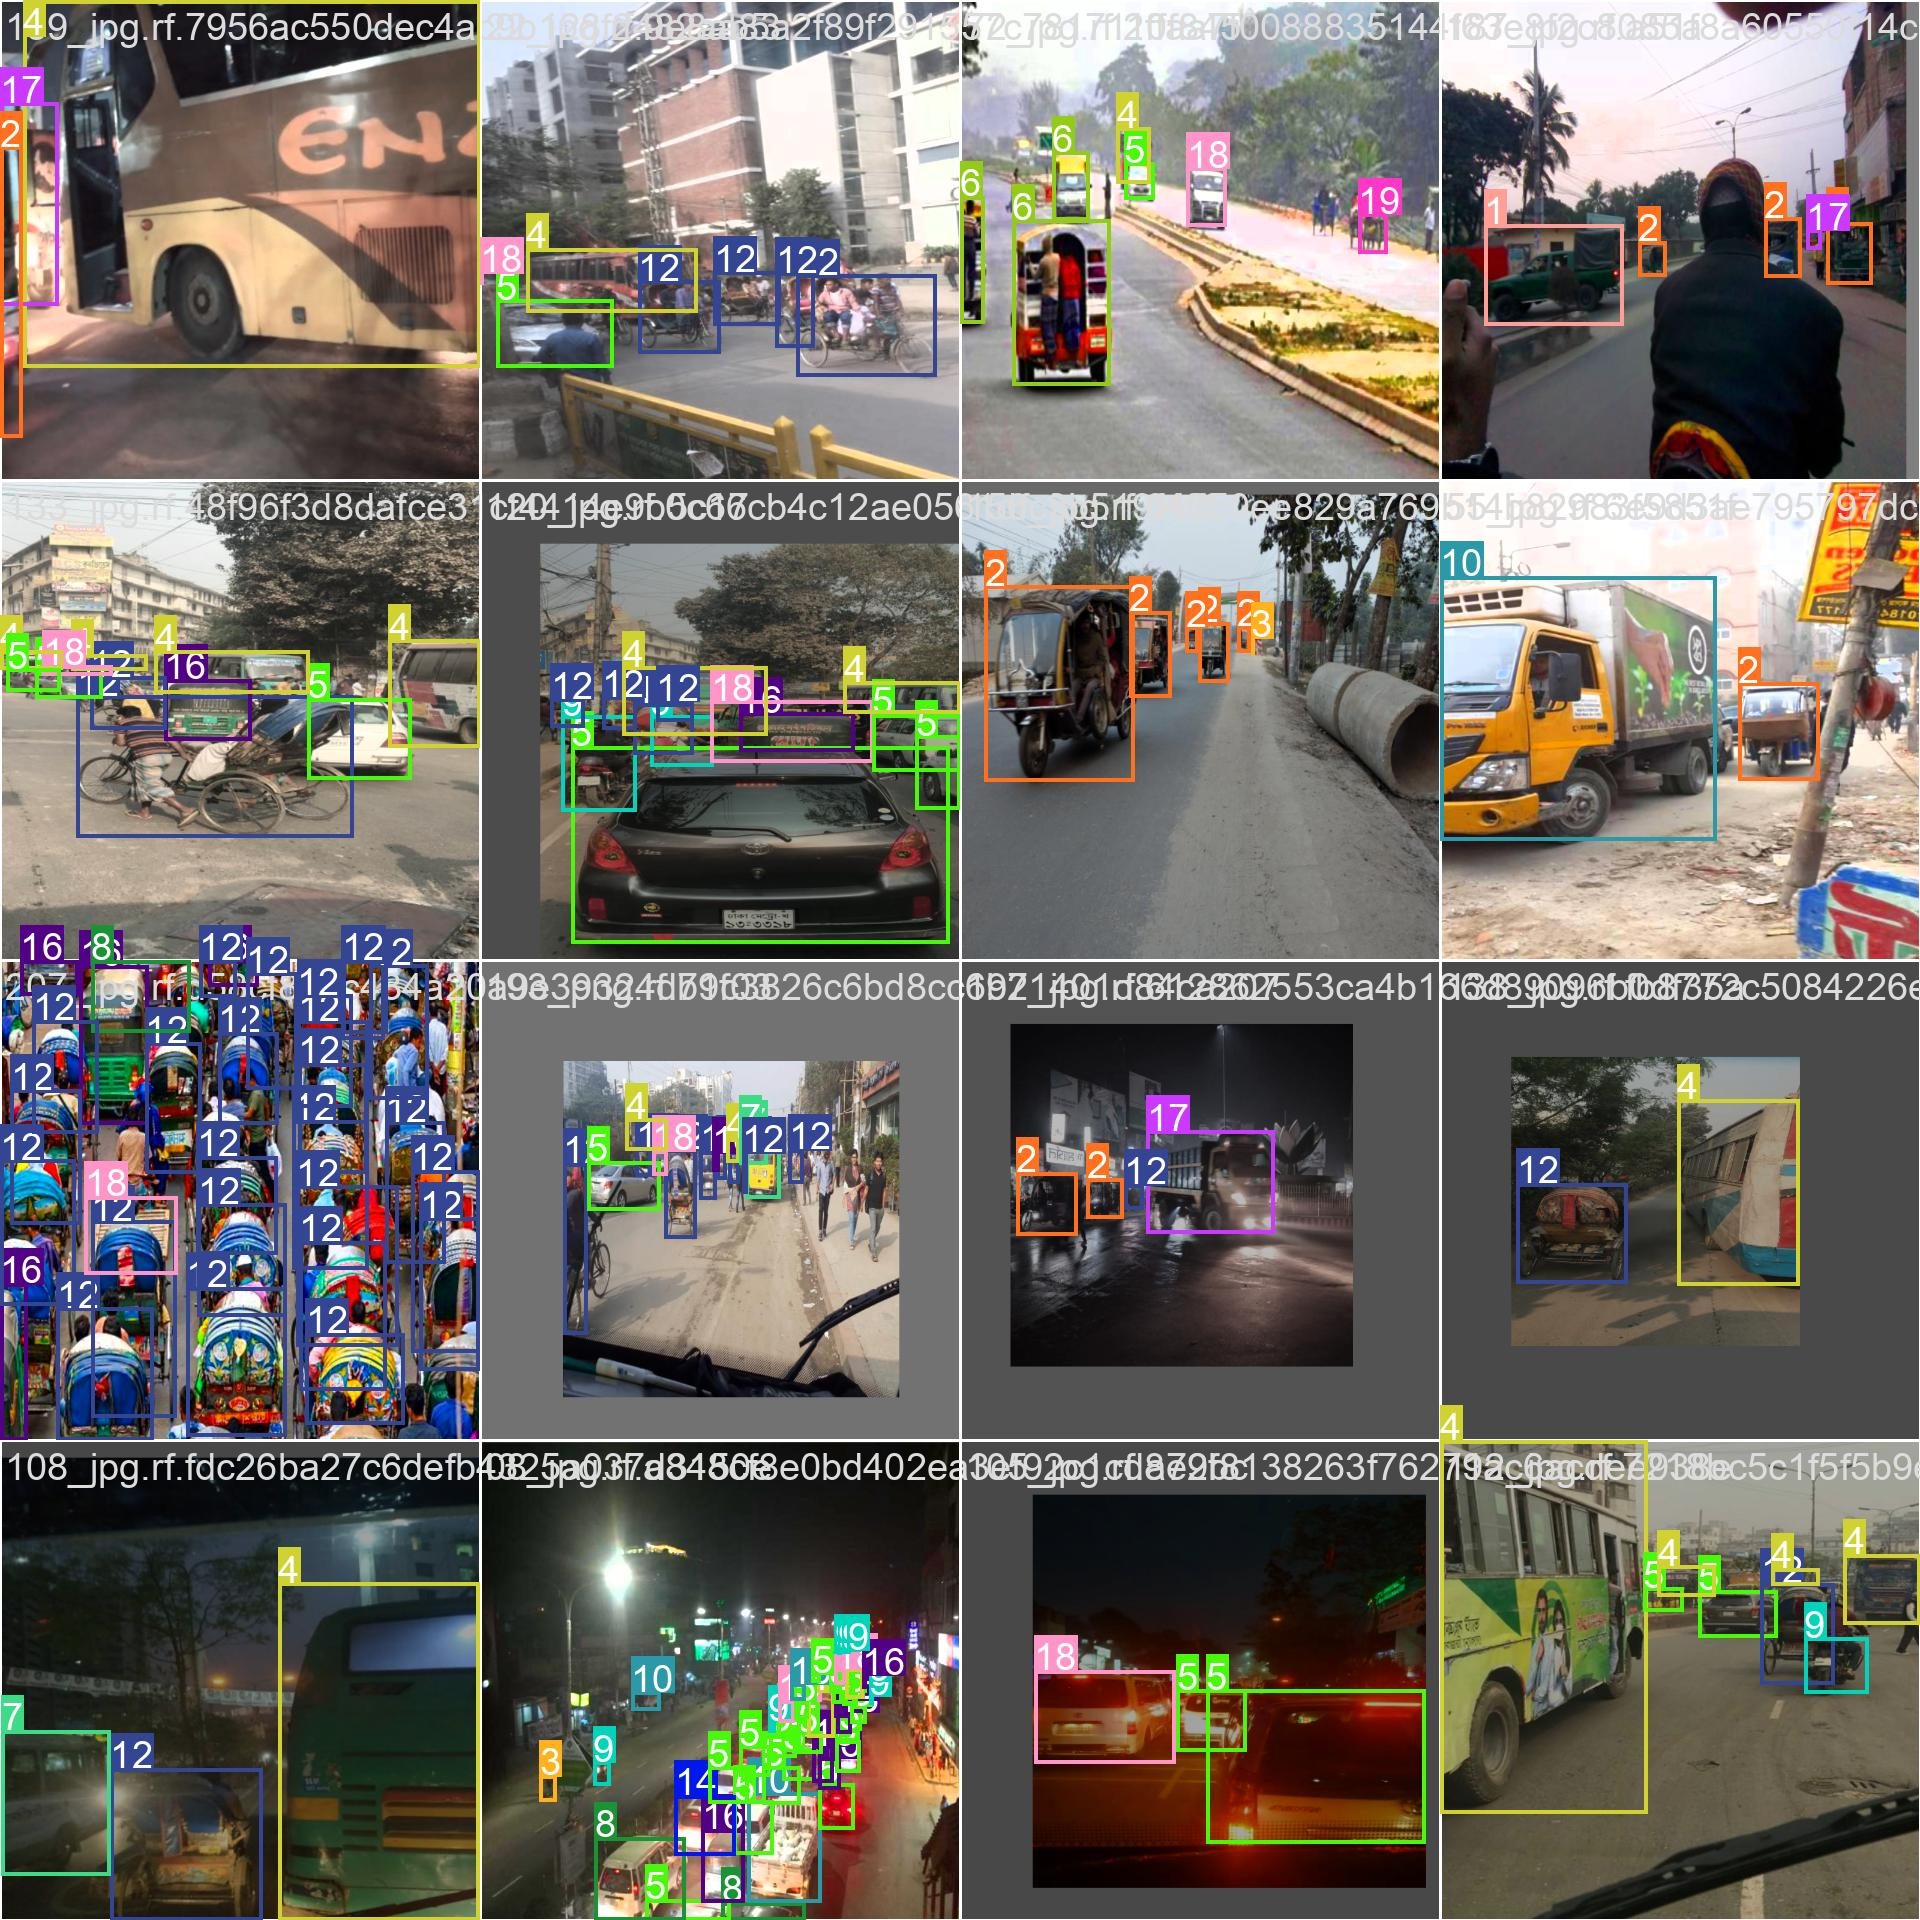

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/train_batch142.jpg',width=600)

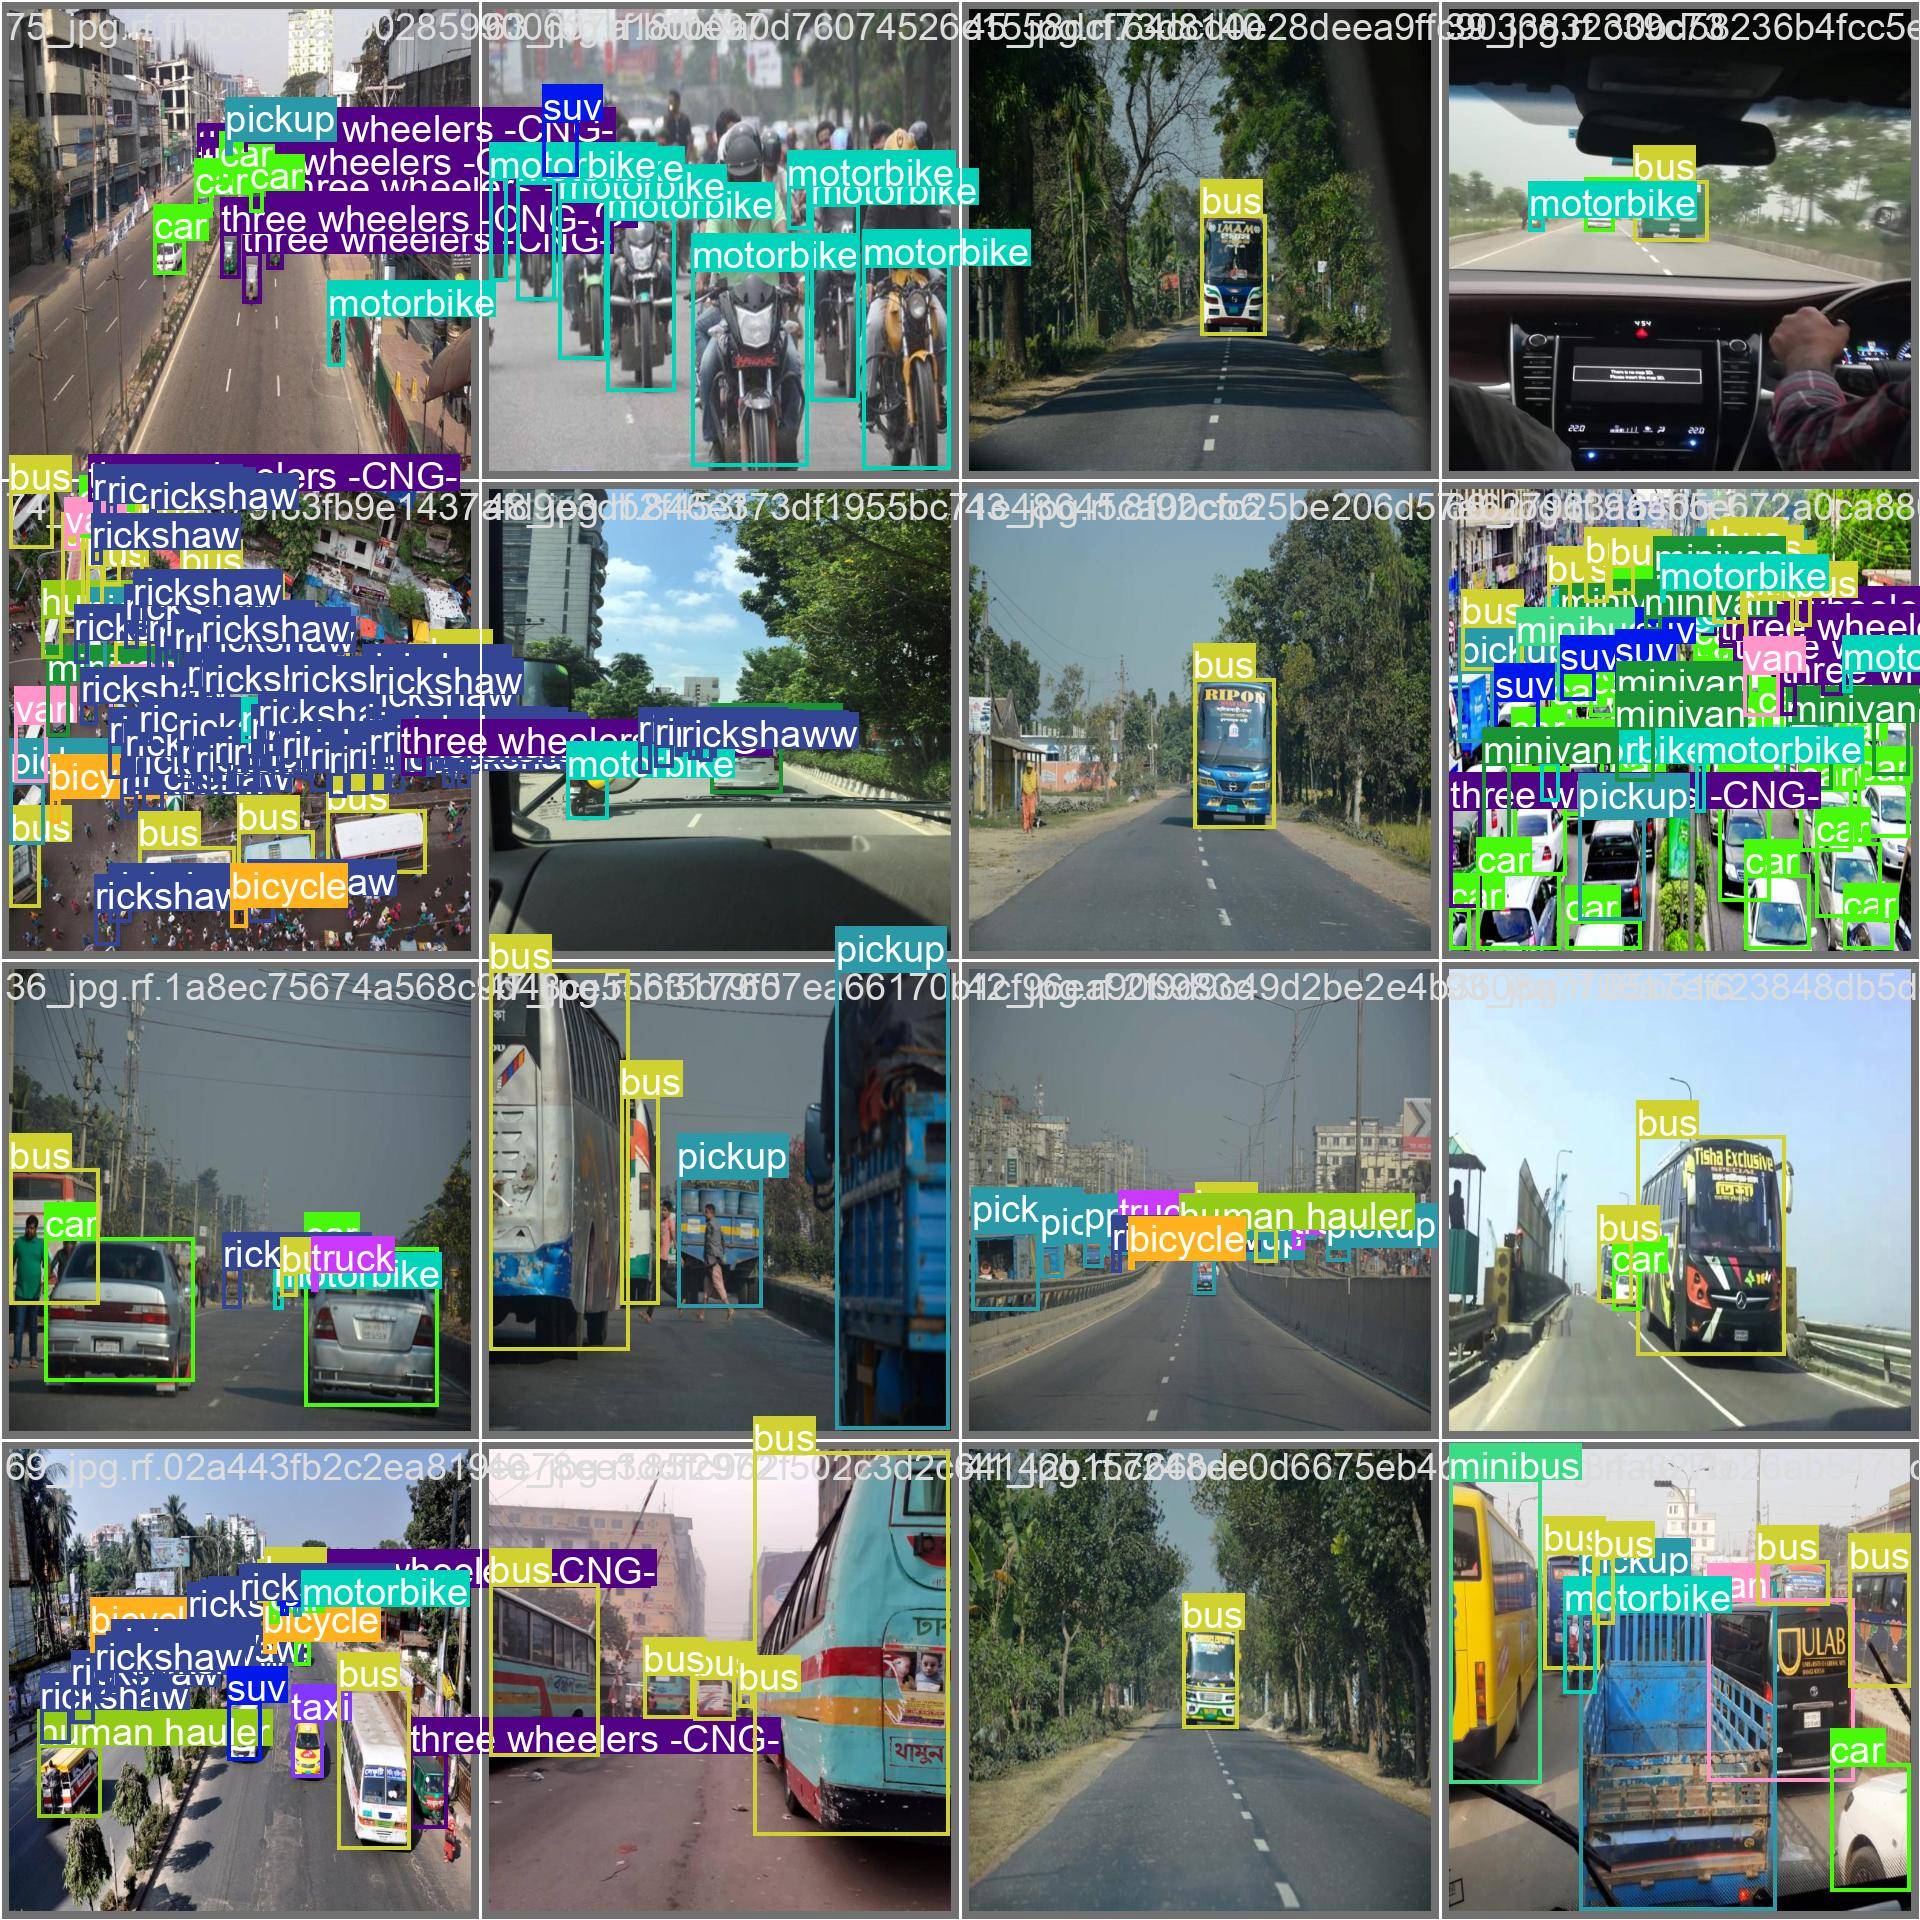

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/val_batch1_labels.jpg',width=600)

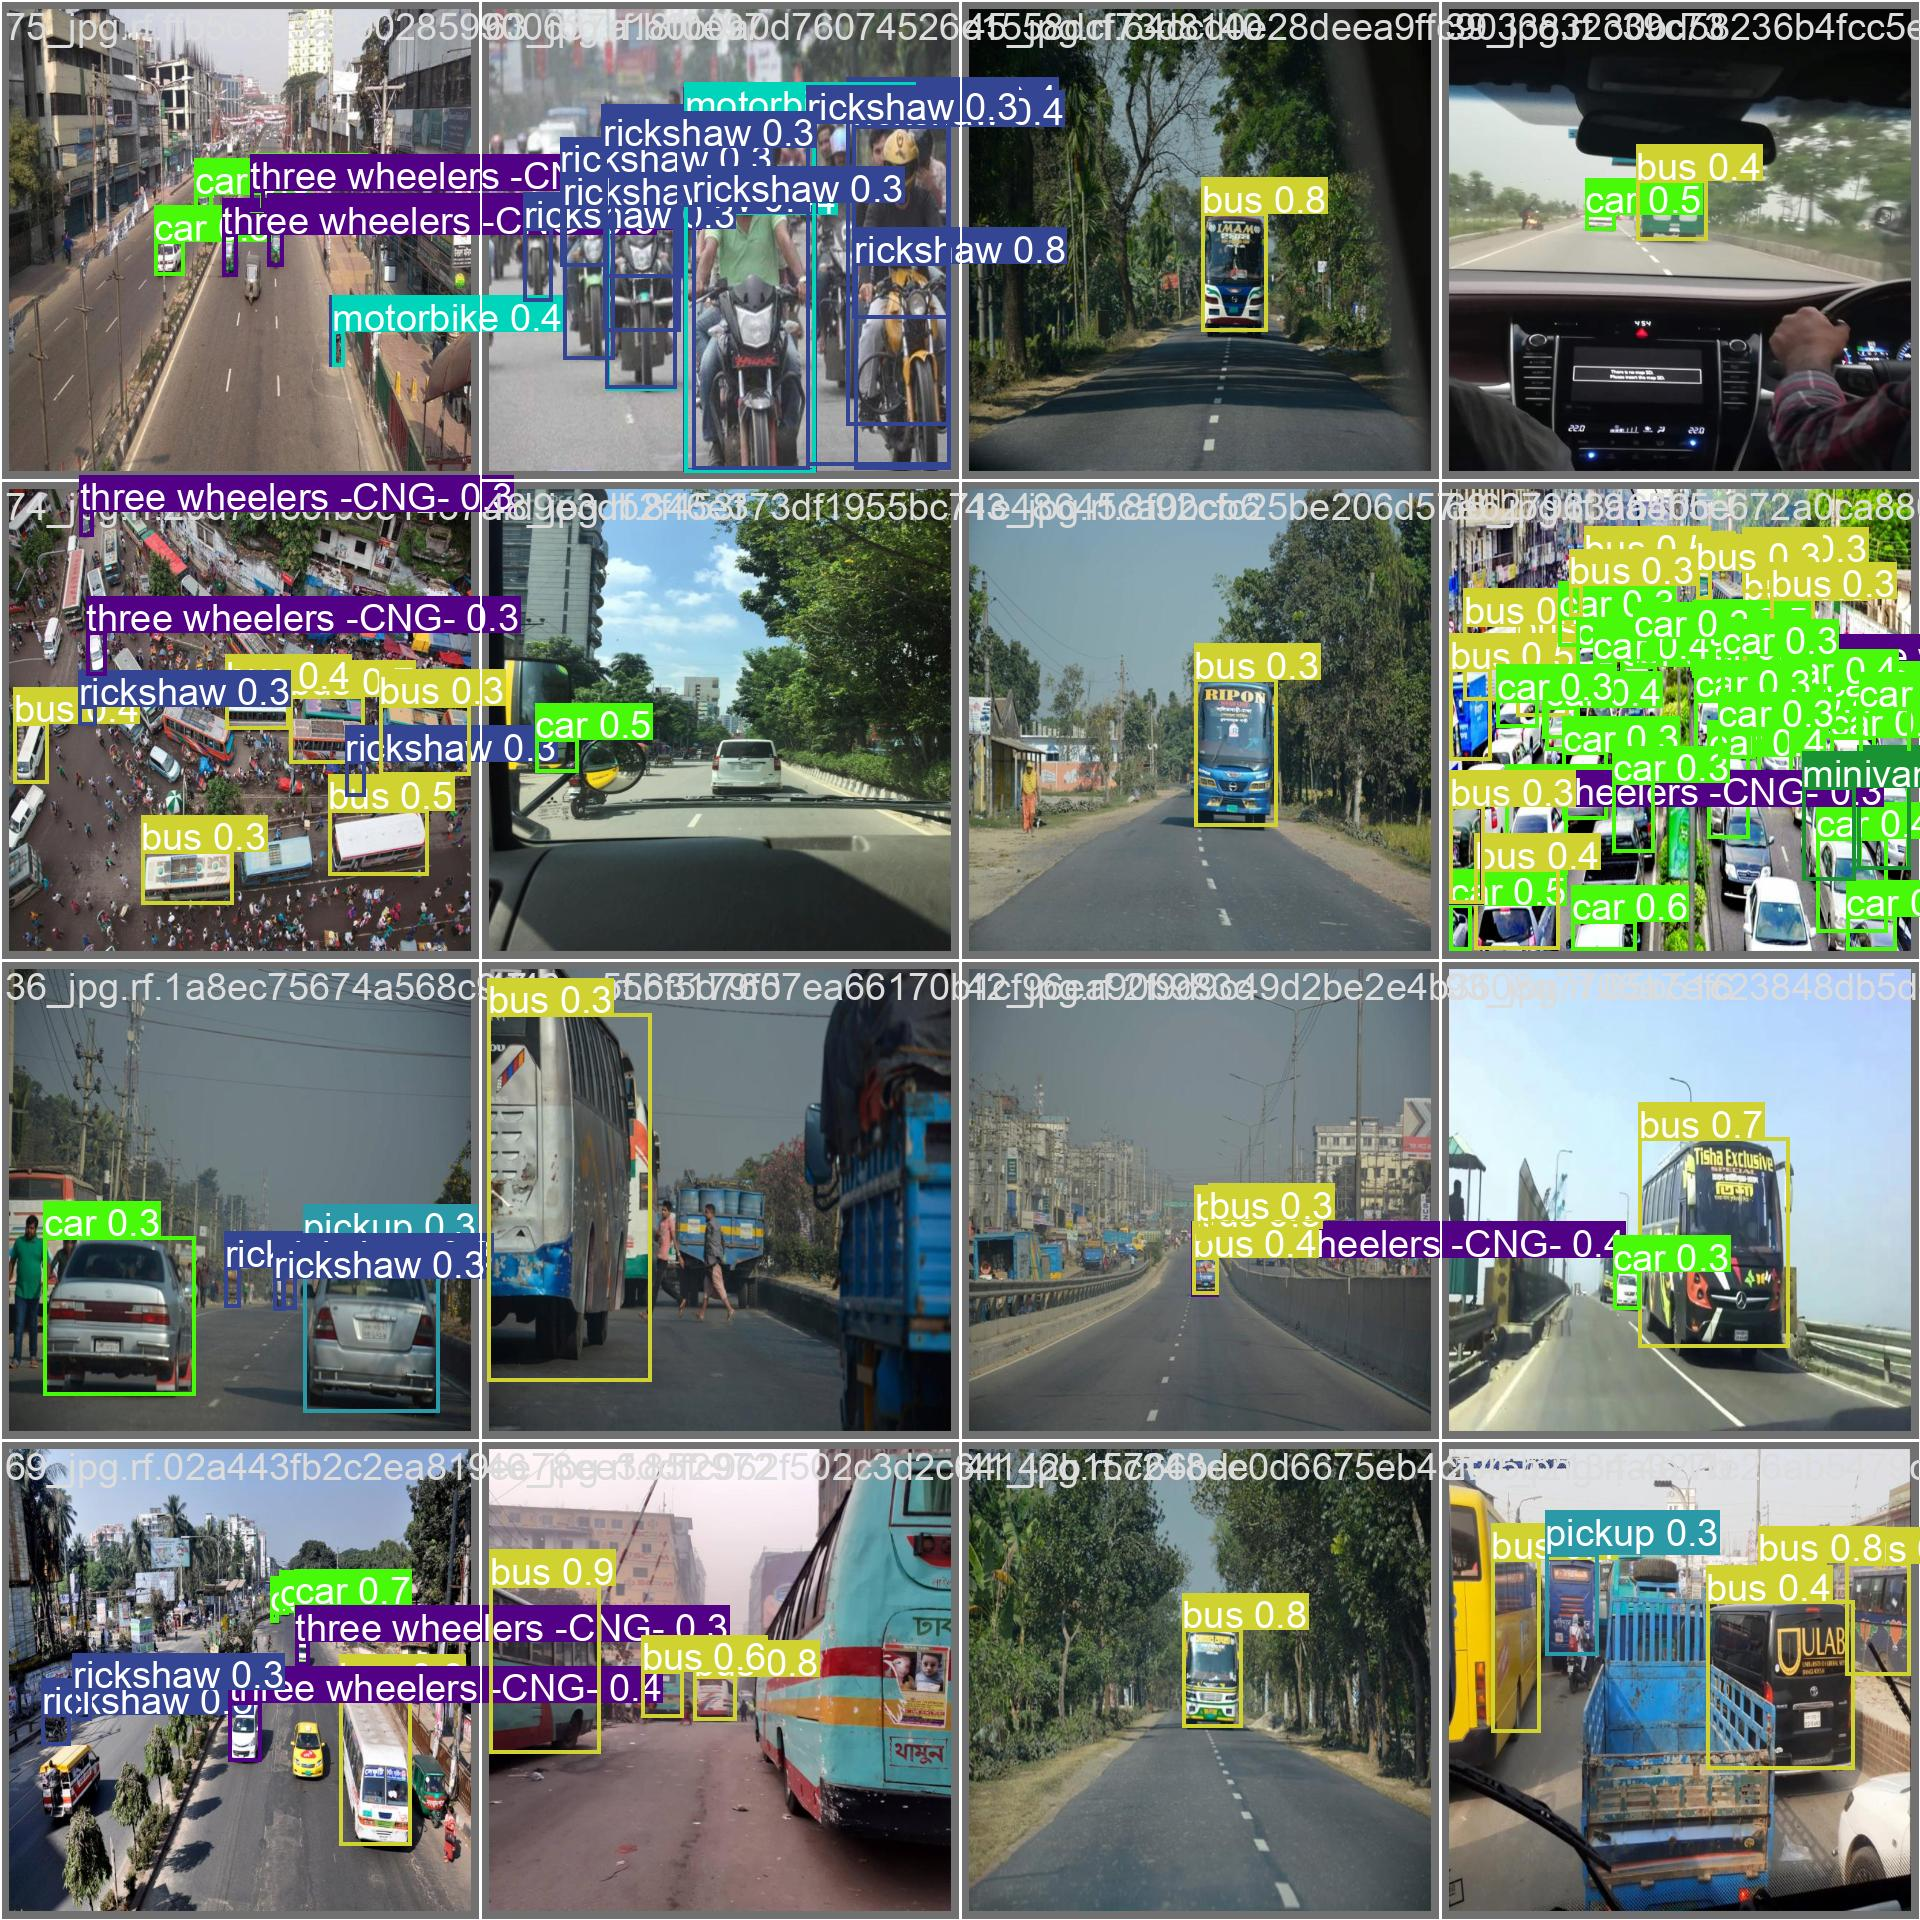

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/val_batch1_pred.jpg',width=600)

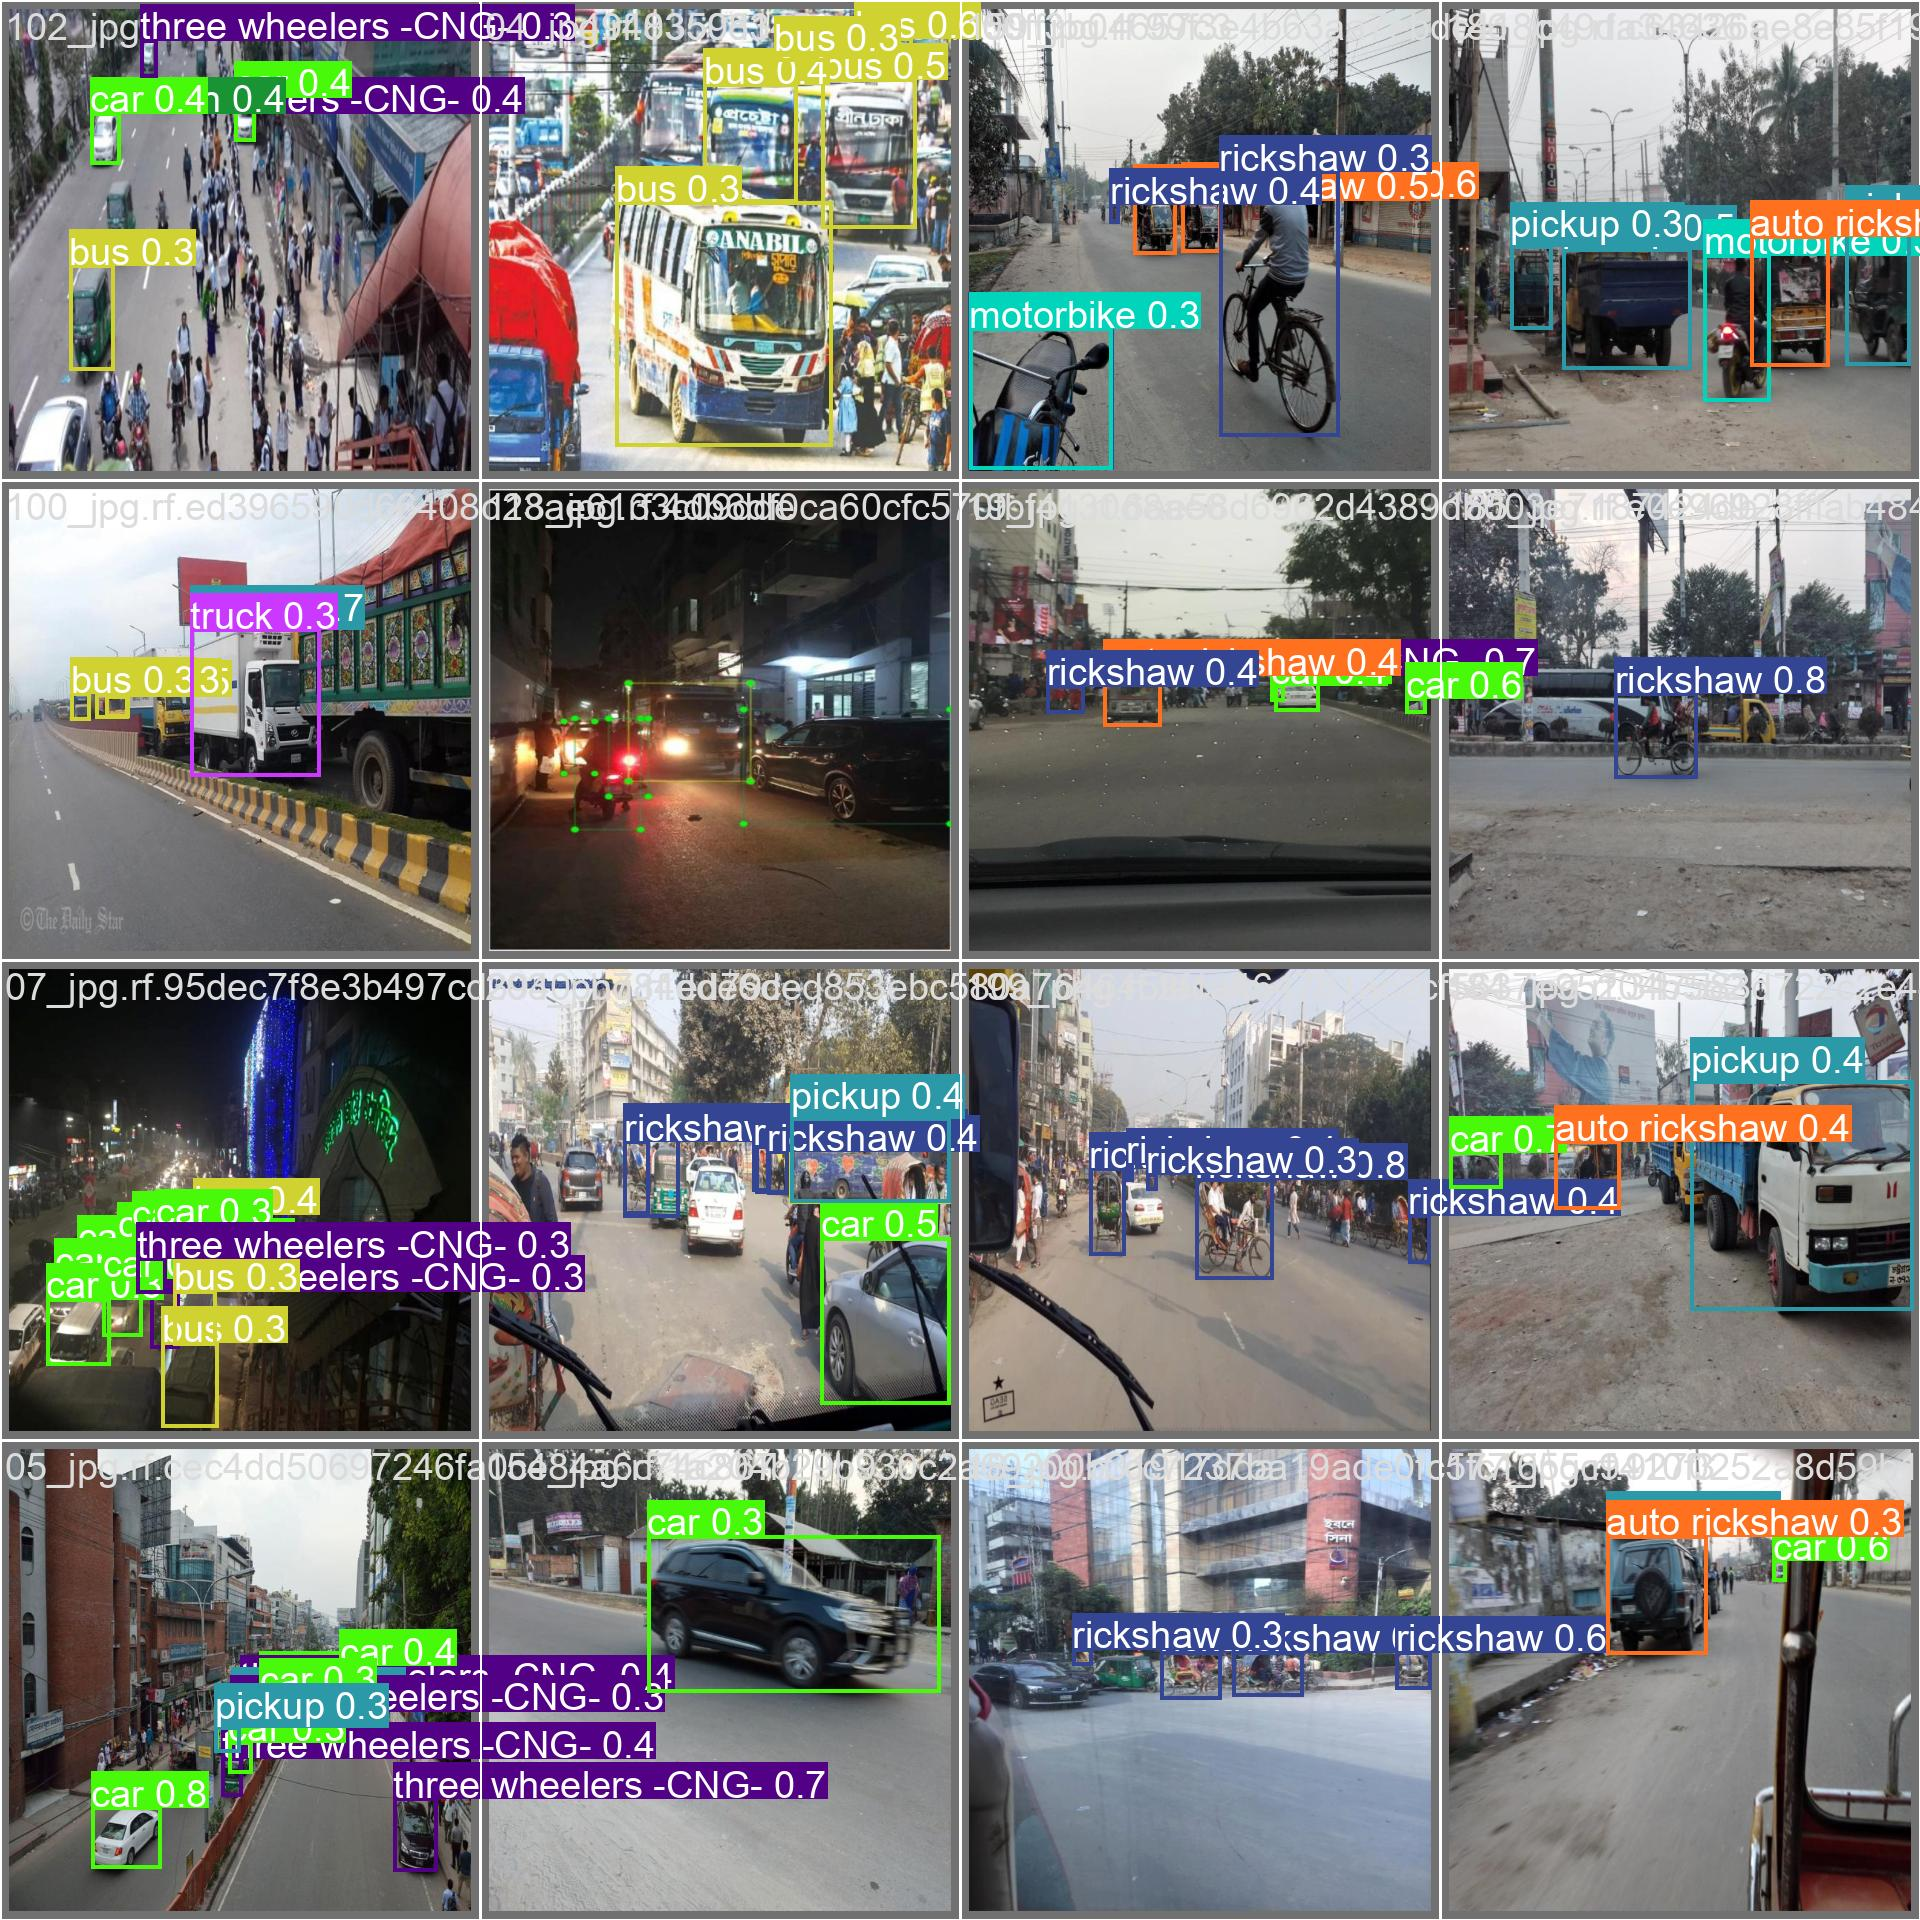

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/val_batch2_pred.jpg',width=600)

In [ ]:
! yolo detect predict model="/content/datasets/runs/detect/train/weights/best.pt" source="/content/pexels_videos_1721294 (1080p).mp4"

2023-10-29 03:41:00.046657: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-29 03:41:00.046714: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-29 03:41:00.046753: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3009548 parameters, 0 gradients

video 1/1 (1/513) /content/pexels_videos_1721294 (1080p).mp4: 480x800 (no detections), 73.7ms
video 1/1 (2/513) /content/pexels_videos_1721294 (1080p).mp4: 480x800 1 bus, 3 cars, 9.1ms
video 1/1 (3/513) /co

In [ ]:
!!ffmpeg -i {"/content/datasets/runs/detect/predict/pexels_videos_1721294 (1080p).avi"} -vcodec libx265 {"trafic.mp4"}

["/bin/bash: -c: line 1: syntax error near unexpected token `('",
 "/bin/bash: -c: line 1: `ffmpeg -i /content/datasets/runs/detect/predict/pexels_videos_1721294 (1080p).avi -vcodec libx265trafic.mp4'"]

In [ ]:
! mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4hb41qOjX29oxqP9v6PZ")
project = rf.workspace("tutorial-nyak3").project("room-object-detection-ztboi")
dataset = project.version(4).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Succe

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to room-object-detection-4 in yolov8:: 100%|██████████| 468/468 [00:00<00:00, 8282.91it/s]


In [ ]:
! yolo task=detect mode=train model=yolov8n.pt  data={dataset.location}/data.yaml epochs=30 imgsz=600

New https://pypi.org/project/ultralytics/8.0.202 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/room-object-detection-4/data.yaml, epochs=30, patience=50, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnost

In [ ]:
! yolo detect predict model="/content/datasets/runs/detect/train/weights/best.pt" source="/content/WhatsApp Video 2023-10-28 at 23.14.20.mp4"

2023-10-29 08:51:51.007722: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-29 08:51:51.007775: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-29 08:51:51.007813: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010913 parameters, 0 gradients

video 1/1 (1/1258) /content/WhatsApp Video 2023-10-28 at 23.14.20.mp4: 608x352 2 chairs, 81.6ms
video 1/1 (2/1258) /content/WhatsApp Video 2023-10-28 at 23.14.20.mp4: 608x352 2 chairs, 6.1ms
video 1/1 (3/12

In [ ]:
! yolo detect predict model="/content/datasets/runs/detect/train/weights/best.pt" source="/content/WhatsApp Video 2023-10-29 at 00.18.08.mp4"

2023-10-29 09:03:45.558585: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-29 09:03:45.558639: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-29 09:03:45.558676: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010913 parameters, 0 gradients

video 1/1 (1/961) /content/WhatsApp Video 2023-10-29 at 00.18.08.mp4: 608x352 (no detections), 83.4ms
video 1/1 (2/961) /content/WhatsApp Video 2023-10-29 at 00.18.08.mp4: 608x352 (no detections), 8.7ms
vid

In [ ]:
! yolo detect predict model="/content/datasets/runs/detect/train/weights/best.pt" source="/content/WhatsApp Video 2023-10-29 at 02.18.03.mp4"

2023-10-29 09:19:56.955190: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-29 09:19:56.955249: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-29 09:19:56.955290: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010913 parameters, 0 gradients

video 1/1 (1/765) /content/WhatsApp Video 2023-10-29 at 02.18.03.mp4: 608x352 1 Outside door, 82.2ms
video 1/1 (2/765) /content/WhatsApp Video 2023-10-29 at 02.18.03.mp4: 608x352 1 Outside door, 8.5ms
video